In [1]:
# disable pycache
import sys
sys.dont_write_bytecode = True
from datetime import datetime
from pudu.apis.raw.gas_api import *
from pudu.apis.raw.pudu_api import *
from pudu.apis.foxx_api import *
from pudu.app.main import App
from pudu.rds import RDSTable
from pudu.rds.utils import *
from pudu.notifications.change_detector import *
from pudu.reporting import *
from pudu.apis import get_schedule_table, get_charging_table, get_events_table, get_location_table, get_robot_status_table, get_ongoing_tasks_table


In [2]:
df = get_robot_status_table(robot_type='pudu', customer_name='SiteIQ')
df

API returned non-success status: DM_FREQUENCY_LIMITED
API returned non-success status: DM_FREQUENCY_LIMITED
API returned non-success status: DM_FREQUENCY_LIMITED
API returned non-success status: DM_FREQUENCY_LIMITED
API returned non-success status: DM_FREQUENCY_LIMITED
API returned non-success status: DM_FREQUENCY_LIMITED
API returned non-success status: DM_FREQUENCY_LIMITED


,Robot SN,Water Level,Sewage Level,Battery Level,Battery SOH,Battery Cycles,Status,Timestamp UTC
0,8110H4802050006,0,0,99,None,None,Online,2026-01-13 05:11:11.346433+00:00
1,8110H4802050005,0,0,100,None,None,Online,2026-01-13 05:11:12.249034+00:00
2,8110H4B08050040,25,0,100,None,None,Online,2026-01-13 05:11:15.305657+00:00
3,811135422060217,0,0,1,None,None,Online,2026-01-13 05:11:20.035440+00:00


In [3]:
config_paths = [
    'database_config.yaml',
    '../src/pudu/configs/database_config.yaml',
    'src/pudu/configs/database_config.yaml',
    'pudu/configs/database_config.yaml',
    '/opt/database_config.yaml'
]
def _load_s3_config(config_path: str):
            try:
                import yaml
                with open(config_path, 'r') as file:
                    config = yaml.safe_load(file)
                    s3_config = config.get('s3_config', {})

                    if s3_config:
                        logger.info(f"Loaded S3 config: region={s3_config.get('region', 'us-east-2')}, "
                                  f"buckets={len(s3_config.get('buckets', {}))}")
                    else:
                        logger.warning("No S3 configuration found - archival may not work")

                    return s3_config
            except Exception as e:
                logger.error(f"Error loading S3 config: {e}")
                return {}

config_path = None
for path in config_paths:
    if os.path.exists(path):
        config_path = path
        break
from pudu.configs.database_config_loader import DynamicDatabaseConfig
config = DynamicDatabaseConfig(config_path)
s3_config = _load_s3_config(config_path)

In [3]:
from pudu.services.work_location_service import WorkLocationService
service = WorkLocationService(config, s3_config)

In [ ]:
service.run_work_location_updates()

api_app_key: APID18lGz1qBaBF9XWuttd5YszenrpsodKgt20i9
api_app_secret: k2fmGdhz6mhqcl79eWot9f2kqoqosC2q0cm6csM1
combined_work_location_data:           robot_sn map_name     x     y     z status          update_time
0  888015806070005     None  None  None  None   idle  2026-01-10 01:19:36
1  888015806070019     None  None  None  None   idle  2026-01-10 01:19:36
combined_mapping_data: Empty DataFrame
Columns: []
Index: []


In [5]:
from datetime import datetime, timedelta, timezone
import pandas as pd
end_time = datetime.now(timezone.utc).strftime("%Y-%m-%d %H:%M:%S")
start_time = (datetime.now(timezone.utc) - timedelta(days=30)).strftime("%Y-%m-%d %H:%M:%S")
start_time, end_time

('2025-12-14 05:09:38', '2026-01-13 05:09:38')

In [6]:
from pudu.apis import get_schedule_table, get_charging_table, get_events_table, get_location_table, get_robot_status_table, get_ongoing_tasks_table
def parse_datetime_column(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """Centralized datetime parsing. Returns DataFrame with new column '{column}_dt'"""
    if df.empty or column not in df.columns:
        return df

    df_copy = df.copy()
    dt_column = f'{column}_dt'
    df_copy[dt_column] = pd.to_datetime(df_copy[column], errors='coerce')
    return df_copy[df_copy[dt_column].notna()]

def calculate_unique_dates(df: pd.DataFrame, datetime_column: str) -> int:
    """Calculate unique dates from a datetime column"""
    if df.empty or datetime_column not in df.columns:
        return 0
    return df[datetime_column].dt.date.nunique()

def calculate_period_length(start_date: str, end_date: str) -> int:
    """Calculate period length in days"""
    try:
        start_dt = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
        end_dt = datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S')

        # Calculate the difference
        diff = end_dt - start_dt
        days_diff = diff.days

        # If there are remaining hours/minutes/seconds, round up to include partial day
        if diff.seconds > 0 or diff.microseconds > 0:
            return days_diff + 1
        else:
            # Exact day boundary - don't add 1
            return days_diff

    except Exception as e:
        logger.error(f"Error calculating period length: {e}")
        return 0

In [9]:
from pudu.apis import get_schedule_table, get_charging_table, get_events_table, get_location_table, get_robot_status_table, get_ongoing_tasks_table
api_app_key = 'APIDinkf8WSR6ESSIjkXxbiQV8v2O8hGdtjjg'
api_app_secret = 'Zi0XWdDIb6TTj4HB0n08MfTaZFvrShoC17xeW2PFG'

In [7]:
# get_robot_details(sn='8110H4517050026', api_app_key=api_app_key, api_app_secret=api_app_secret)

In [8]:
client = create_pudu_api_client(api_app_key, api_app_secret)

In [ ]:
client.get_robot_

TypeError: get_robot_details() missing 1 required positional argument: 'sn'

In [7]:
s = 'SiteIQ.8'
len(s)

8

In [11]:
df = get_robot_status_table(robot_type='pudu', customer_name='CPS')

API returned non-success status: DM_FREQUENCY_LIMITED
API returned non-success status: DM_FREQUENCY_LIMITED


In [12]:
df

,Robot SN,Water Level,Sewage Level,Battery Level,Battery SOH,Battery Cycles,Status,Timestamp UTC
0,888015611060027,0,0,100,None,None,Online,2026-01-13 05:10:13.822157+00:00
1,888015919070011,0,0,24,None,None,Online,2026-01-13 05:10:14.690609+00:00


In [8]:
# conver start time from utc to new york time
df['Start Time'] = pd.to_datetime(df['Start Time']) - timedelta(hours=5)
df['End Time'] = pd.to_datetime(df['End Time']) - timedelta(hours=5)
df.sort_values(by='Start Time', inplace=True, ascending=False)
df.head()

,Location ID,Task Name,Task ID,Robot SN,Map Name,Is Report,Map URL,Actual Area,Plan Area,Start Time,...,Progress,Status,Mode,Sub Mode,Type,Vacuum Speed,Vacuum Suction,Wash Speed,Wash Suction,Wash Water
57,539570004,Hula scrub floor 2,1186317514339532800,888015611060045,1#2#Walmart-Hula-2nd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,478.08,478.08,2026-01-08 02:52:12,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Energy Saving,Medium,Low
22,539570001,MaverickScrub-1-1,1176526540130238464,888015611060031,1#4#Maverik_1,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,1.88,187.50,2026-01-08 01:45:32,...,1,Task Interrupted,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
58,539570004,hula scrub floor 4,1186626465811677184,888015611060045,1#8#Walmart-Hula-4th-v2,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,496.44,496.44,2026-01-08 00:52:17,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Energy Saving,Medium,Low
2,513470004,3rd floor scrub,1181560332855296000,888015611060003,1#13#WM-Sams-Floor3,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,536.78,536.78,2026-01-08 00:13:03,...,100,Task Abnormal,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
24,539570001,MaverickScrub-3-1,1176470729920102400,888015611060031,3#6#Maverick_Floor3,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,43.75,243.05,2026-01-07 23:59:37,...,18,Task Interrupted,Scrubbing,Custom,Custom,Off,Off,Energy Saving,Medium,Low


In [9]:
df.loc[df['Start Time'] >= '2026-01-08 00:00:00']

,Location ID,Task Name,Task ID,Robot SN,Map Name,Is Report,Map URL,Actual Area,Plan Area,Start Time,...,Progress,Status,Mode,Sub Mode,Type,Vacuum Speed,Vacuum Suction,Wash Speed,Wash Suction,Wash Water
57,539570004,Hula scrub floor 2,1186317514339532800,888015611060045,1#2#Walmart-Hula-2nd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,478.08,478.08,2026-01-08 02:52:12,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Energy Saving,Medium,Low
22,539570001,MaverickScrub-1-1,1176526540130238464,888015611060031,1#4#Maverik_1,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,1.88,187.50,2026-01-08 01:45:32,...,1,Task Interrupted,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
58,539570004,hula scrub floor 4,1186626465811677184,888015611060045,1#8#Walmart-Hula-4th-v2,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,496.44,496.44,2026-01-08 00:52:17,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Energy Saving,Medium,Low
2,513470004,3rd floor scrub,1181560332855296000,888015611060003,1#13#WM-Sams-Floor3,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,536.78,536.78,2026-01-08 00:13:03,...,100,Task Abnormal,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium


In [16]:
df.loc[df['Robot SN'] == '888015806070005']

,Location ID,Task Name,Task ID,Robot SN,Map Name,Is Report,Map URL,Actual Area,Plan Area,Start Time,...,Progress,Status,Mode,Sub Mode,Type,Vacuum Speed,Vacuum Suction,Wash Speed,Wash Suction,Wash Water
0,551570001,Main Kitchen,1191222616124833792,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,272.43,272.43,2026-01-08 15:00:45,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
1,551570001,Serving Area,1191222970187005952,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,218.20,218.20,2026-01-08 13:24:10,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
2,551570001,Cafeteria Seating,1191223230837833728,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,492.27,492.27,2026-01-08 12:00:45,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
3,551570001,Pots and Pans,1191222211642933248,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,126.07,126.07,2026-01-08 03:30:45,...,100,Task Abnormal,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
4,551570001,Cafeteria Seating,1191223230837833728,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,492.27,492.27,2026-01-07 23:38:17,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
5,551570001,Coffee Bar,1191223452422914048,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,104.09,104.09,2026-01-07 21:00:45,...,100,Task Abnormal,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
6,551570001,Main Kitchen,1191222616124833792,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,272.43,272.43,2026-01-07 20:00:45,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
7,551570001,Cafeteria Seating,1191223230837833728,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,492.27,492.27,2026-01-07 18:00:45,...,100,Task Abnormal,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
8,551570001,Main Kitchen,1191222616124833792,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,272.43,272.43,2026-01-07 15:00:45,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
9,551570001,Serving Area,1191222970187005952,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,218.20,218.20,2026-01-07 13:26:58,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium


In [10]:
df

,Location ID,Task Name,Task ID,Robot SN,Map Name,Is Report,Map URL,Actual Area,Plan Area,Start Time,...,Progress,Status,Mode,Sub Mode,Type,Vacuum Speed,Vacuum Suction,Wash Speed,Wash Suction,Wash Water
0,551570001,Main Kitchen,1191222616124833792,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,272.43,272.43,2026-01-08 15:00:45,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
1,551570001,Serving Area,1191222970187005952,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,218.20,218.20,2026-01-08 13:24:10,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
2,551570001,Cafeteria Seating,1191223230837833728,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,492.27,492.27,2026-01-08 12:00:45,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
3,551570001,Pots and Pans,1191222211642933248,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,126.07,126.07,2026-01-08 03:30:45,...,100,Task Abnormal,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
4,551570001,Cafeteria Seating,1191223230837833728,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,492.27,492.27,2026-01-07 23:38:17,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
5,551570001,Coffee Bar,1191223452422914048,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,104.09,104.09,2026-01-07 21:00:45,...,100,Task Abnormal,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
6,551570001,Main Kitchen,1191222616124833792,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,272.43,272.43,2026-01-07 20:00:45,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
7,551570001,Cafeteria Seating,1191223230837833728,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,492.27,492.27,2026-01-07 18:00:45,...,100,Task Abnormal,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
8,551570001,Main Kitchen,1191222616124833792,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,272.43,272.43,2026-01-07 15:00:45,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
9,551570001,Serving Area,1191222970187005952,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,218.20,218.20,2026-01-07 13:26:58,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium


In [7]:
df.loc[df['Robot SN'] == '888015806070005']

,Location ID,Task Name,Task ID,Robot SN,Map Name,Is Report,Map URL,Actual Area,Plan Area,Start Time,...,Progress,Status,Mode,Sub Mode,Type,Vacuum Speed,Vacuum Suction,Wash Speed,Wash Suction,Wash Water
0,551570001,Coffee Bar,1191223452422914048,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,104.09,104.09,2025-12-26 21:00:28,...,100,Task Abnormal,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
1,551570001,Main Kitchen,1191222616124833792,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,272.43,272.43,2025-12-26 20:00:28,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
2,551570001,Cafeteria Seating,1191223230837833728,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,492.27,492.27,2025-12-26 18:00:28,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
3,551570001,Back Hallways,1191217820382806016,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,101.28,101.28,2025-12-26 16:07:22,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
4,551570001,Dish Room,1191217470162616320,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,89.97,89.97,2025-12-26 16:00:30,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
5,551570001,Main Kitchen,1191222616124833792,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,231.57,272.43,2025-12-26 15:00:28,...,85,Task Cancelled,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
6,551570001,Cafeteria Seating,1191223230837833728,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,393.82,492.27,2025-12-26 12:00:30,...,80,Task Cancelled,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
7,551570001,Pots and Pans,1191222211642933248,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,126.07,126.07,2025-12-26 03:30:28,...,100,Task Abnormal,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
8,551570001,Cafeteria Seating,1191223230837833728,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,492.27,492.27,2025-12-26 01:00:28,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
9,551570001,Main Kitchen,1191222616124833792,888015806070005,1#1#Mercy1400,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,272.43,272.43,2025-12-25 20:00:28,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium


In [12]:
df

,Location ID,Task Name,Task ID,Robot SN,Map Name,Is Report,Map URL,Actual Area,Plan Area,Start Time,...,Progress,Status,Mode,Sub Mode,Type,Vacuum Speed,Vacuum Suction,Wash Speed,Wash Suction,Wash Water


stores: [{'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '434100007', 'shop_name': 'USF demo'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '434300005', 'shop_name': 'USF'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '450270000', 'shop_name': 'salt-lake-airport'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '513370000', 'shop_name': 'Demo'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '523670000', 'shop_name': 'demo-all'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '530470002', 'shop_name': 'Mobiltech'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '533370001', 'shop_name': 'University of Florida'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '543170000', 'shop_name': '123Bots'}, {'company_id': '100007356', 'company_name': '123Bots', 'shop_id': '551570001', 'shop_name': 'Mercy Jefferson'}, {'company_id': '100007356', 'company_name': '123Bots', 'shop_id': '551570020', 'shop_name': 'Mercy South'}]


stores: [{'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '434100007', 'shop_name': 'USF demo'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '434300005', 'shop_name': 'USF'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '450270000', 'shop_name': 'salt-lake-airport'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '513370000', 'shop_name': 'Demo'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '523670000', 'shop_name': 'demo-all'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '530470002', 'shop_name': 'Mobiltech'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '533370001', 'shop_name': 'University of Florida'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '543170000', 'shop_name': '123Bots'}, {'company_id': '100007356', 'company_name': '123Bots', 'shop_id': '551570001', 'shop_name': 'Mercy Jefferson'}, {'company_id': '100007356', 'company_name': '123Bots', 'shop_id': '551570020', 'shop_name': 'Mercy South'}]


response: {'data': {'count': 12, 'list': [{'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '434100007', 'shop_name': 'USF demo'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '434300005', 'shop_name': 'USF'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '450270000', 'shop_name': 'salt-lake-airport'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '513370000', 'shop_name': 'Demo'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '523670000', 'shop_name': 'demo-all'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '530470002', 'shop_name': 'Mobiltech'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '533370001', 'shop_name': 'University of Florida'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '543170000', 'shop_name': '123Bots'}, {'company_id': '100007356', 'company_name': '123Bots', 'shop_id': '551570001', 'shop_name': 'Mercy Jefferson'}, {'company_id': '100007356', 'company_name': '123Bots', 'shop_id': '551570020', 'shop_name': 'Mercy South'}]}, 'message': 'success', 'trace_id': 'APID18lGz1qBaBF9XWuttd5YszenrpsodKgt20i9_08ebd4ad-1146-42db-ad43-993c3a6a65d1'}


stores: [{'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '434100007', 'shop_name': 'USF demo'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '434300005', 'shop_name': 'USF'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '450270000', 'shop_name': 'salt-lake-airport'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '513370000', 'shop_name': 'Demo'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '523670000', 'shop_name': 'demo-all'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '530470002', 'shop_name': 'Mobiltech'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '533370001', 'shop_name': 'University of Florida'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '543170000', 'shop_name': '123Bots'}, {'company_id': '100007356', 'company_name': '123Bots', 'shop_id': '551570001', 'shop_name': 'Mercy Jefferson'}, {'company_id': '100007356', 'company_name': '123Bots', 'shop_id': '551570020', 'shop_name': 'Mercy South'}]


In [ ]:
get_ongoing_tasks_table(customer_name='SiteIQ')

In [9]:
client = create_pudu_api_client(api_app_key, api_app_secret)

In [ ]:
start_time = '2025-12-22 00:00:00'
end_time = '2025-12-27 23:59:59'

In [12]:
client.get_battery_health_list(start_time, end_time)

API returned non-success status: DM_FREQUENCY_LIMITED


{'message': 'DM_FREQUENCY_LIMITED',
 'trace_id': 'APID18lGz1qBaBF9XWuttd5YszenrpsodKgt20i9_393bb599-4bc1-4fc2-b7ee-8ae96f9965da'}

In [ ]:
get_charging_table(start_time, end_time, customer_name='123Bots')

API returned non-success status: DM_FREQUENCY_LIMITED - https://csu-open-platform.pudutech.com/pudu-entry/data-board/v1/log/battery/query_list?start_time=1766361600&end_time=1766966399&sn=888015806070016
API returned non-success status: DM_FREQUENCY_LIMITED - https://csu-open-platform.pudutech.com/pudu-entry/data-board/v1/log/battery/query_list?start_time=1766361600&end_time=1766966399&sn=888015806070020
API returned non-success status: DM_FREQUENCY_LIMITED - https://csu-open-platform.pudutech.com/pudu-entry/data-board/v1/log/battery/query_list?start_time=1766361600&end_time=1766966399&sn=888015806070020
API returned non-success status: DM_FREQUENCY_LIMITED - https://csu-open-platform.pudutech.com/pudu-entry/data-board/v1/log/battery/query_list?start_time=1766361600&end_time=1766966399&sn=888015806070014
API returned non-success status: DM_FREQUENCY_LIMITED - https://csu-open-platform.pudutech.com/pudu-entry/data-board/v1/log/battery/query_list?start_time=1766361600&end_time=1766966399

In [14]:
client.get_list_stores()['list']

url: https://csu-open-platform.pudutech.com/pudu-entry/data-open-platform-service/v1/api/shop?
response: {'data': {'count': 12, 'list': [{'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '434100007', 'shop_name': 'USF demo'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '434300005', 'shop_name': 'USF'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '450270000', 'shop_name': 'salt-lake-airport'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '513370000', 'shop_name': 'Demo'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '523670000', 'shop_name': 'demo-all'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '530470002', 'shop_name': 'Mobiltech'}, {'company_id': '100004935', 'company_name': 'Foxx Development Inc.', 'shop_id': '533370001', 'shop_name': 'University of Florida'}, {'company_id': '

[{'company_id': '100004935',
  'company_name': 'Foxx Development Inc.',
  'shop_id': '434100007',
  'shop_name': 'USF demo'},
 {'company_id': '100004935',
  'company_name': 'Foxx Development Inc.',
  'shop_id': '434300005',
  'shop_name': 'USF'},
 {'company_id': '100004935',
  'company_name': 'Foxx Development Inc.',
  'shop_id': '450270000',
  'shop_name': 'salt-lake-airport'},
 {'company_id': '100004935',
  'company_name': 'Foxx Development Inc.',
  'shop_id': '513370000',
  'shop_name': 'Demo'},
 {'company_id': '100004935',
  'company_name': 'Foxx Development Inc.',
  'shop_id': '523670000',
  'shop_name': 'demo-all'},
 {'company_id': '100004935',
  'company_name': 'Foxx Development Inc.',
  'shop_id': '530470002',
  'shop_name': 'Mobiltech'},
 {'company_id': '100004935',
  'company_name': 'Foxx Development Inc.',
  'shop_id': '533370001',
  'shop_name': 'University of Florida'},
 {'company_id': '100004935',
  'company_name': 'Foxx Development Inc.',
  'shop_id': '543170000',
  'sho

In [8]:
results = client.get_cleaning_report_list(start_time, end_time,
                                               timezone_offset=0)['list']

In [10]:
results

[{'clean_area': 7.999157905578613,
  'clean_time': 72,
  'create_time': '2025-12-25 02:13:32',
  'end_time': 1766628805,
  'mac': '50:CF:14:0D:6B:A0',
  'mode': 1,
  'report_id': '1201499814572593152',
  'sn': '888015806070018',
  'start_time': 1766626344,
  'status': 6,
  'sub_mode': 0,
  'task_area': 157.9499969482422,
  'task_name': 'Together scrub_4'},
 {'clean_area': 2193.811279296875,
  'clean_time': 10644,
  'create_time': '2025-12-25 02:09:22',
  'end_time': 1766628553,
  'mac': '40:55:48:B9:8E:0D',
  'mode': 2,
  'report_id': '1201461575849611264',
  'sn': '888015611060002',
  'start_time': 1766617227,
  'status': 4,
  'sub_mode': 2000,
  'task_area': 2384.079978942871,
  'task_name': 'TrustVac-3-1'},
 {'clean_area': 1004.3935546875,
  'clean_time': 4193,
  'create_time': '2025-12-25 01:44:03',
  'end_time': 1766627033,
  'mac': 'B4:2F:03:A9:75:FC',
  'mode': 2,
  'report_id': '1201484088453369856',
  'sn': '888015611060005',
  'start_time': 1766622594,
  'status': 3,
  'sub_m

In [7]:
get_robot_status_table()

,Robot SN,Water Level,Sewage Level,Battery Level,Battery SOH,Battery Cycles,Status,Timestamp UTC,Robot Name,Shop ID,Shop Name
0,8110H4802050006,0,0,99,None,None,Online,2025-11-19 17:59:19.996350+00:00,A1-terminal,450270000,salt-lake-airport
1,8110H4802050005,0,0,100,None,None,Online,2025-11-19 17:59:21.327628+00:00,LDS-test,450270000,salt-lake-airport
2,8110H4B08050040,25,0,100,100%,22,Online,2025-11-19 17:59:23.153662+00:00,Baltimore,513370000,Demo
3,811135422060217,0,0,1,None,None,Online,2025-11-19 17:59:25.113901+00:00,demo-1,530470002,Mobiltech
4,811135422060228,0,0,100,98%,68,Online,2025-11-19 17:59:26.907229+00:00,Building_43_Marston_Library,533370001,University of Florida
5,811135422060216,0,0,53,99%,62,Online,2025-11-19 17:59:28.373972+00:00,Building_205_Dental_Science,533370001,University of Florida
6,811064412050012,50,0,100,100%,59,Online,2025-11-19 17:59:29.903774+00:00,Dental Replacement,533370001,University of Florida
7,888015806070005,0,100,100,None,None,Online,2025-11-19 17:59:31.478381+00:00,CC1 - Not Active,543170000,123Bots
8,811135422060236,100,0,100,100%,10,Online,2025-11-19 17:59:32.947939+00:00,901 Washington,543170000,123Bots
9,888015611060042,100,0,93,100%,23,Online,2025-11-19 17:59:34.411722+00:00,6th Children’s Tower,543170000,123Bots


In [12]:
api_app_key = 'APID18lGz1qBaBF9XWuttd5YszenrpsodKgt20i9'
api_app_secret = 'k2fmGdhz6mhqcl79eWot9f2kqoqosC2q0cm6csM1'

get_robot_details(sn='811064412050012', api_app_key=api_app_key, api_app_secret=api_app_secret)

{'battery': 100,
 'cleanbot': {'clean': None,
  'detail': '',
  'last_mode': 1,
  'last_task': '1153255765814296576',
  'rising': 50,
  'sewage': 0,
  'task': 202},
 'mac': 'B0:0C:9D:59:16:E8',
 'map': {'floor': '', 'lv': 18, 'name': '1#0#Bld_205_Dental_Sci_1fl'},
 'nickname': 'Dental Replacement ',
 'online': True,
 'position': {'x': -0.21491543828697957,
  'y': -0.023865476765248417,
  'z': 0.008105264265588552},
 'shop': {'id': 533370001, 'name': 'University of Florida'},
 'sn': '811064412050012'}

In [8]:
get_schedule_table(start_time=start_time, end_time=end_time, api_app_key=api_app_key, api_app_secret=api_app_secret)

TypeError: get_schedule_table() got an unexpected keyword argument 'api_app_key'

In [11]:
get_list_robots(api_app_key=api_app_key, api_app_secret=api_app_secret)

{'count': 32,
 'list': [{'mac': 'B0:0C:9D:59:16:E8',
   'product_code': 'CC1',
   'shop_id': '533370001',
   'shop_name': 'University of Florida',
   'sn': '811064412050012'},
  {'mac': '90:03:71:42:9E:54',
   'product_code': 'CC1',
   'shop_id': '450270000',
   'shop_name': 'salt-lake-airport',
   'sn': '8110H4802050005'},
  {'mac': '90:03:71:42:99:EB',
   'product_code': 'CC1',
   'shop_id': '450270000',
   'shop_name': 'salt-lake-airport',
   'sn': '8110H4802050006'},
  {'mac': '00:D6:CB:4B:17:DF',
   'product_code': 'CC1',
   'shop_id': '513370000',
   'shop_name': 'Demo',
   'sn': '8110H4B08050040'},
  {'mac': '58:BF:25:F8:56:FA',
   'product_code': '',
   'shop_id': '0',
   'shop_name': '',
   'sn': '8SD014424050087'},
  {'mac': '14:80:CC:89:27:83',
   'product_code': 'CC1',
   'shop_id': '0',
   'shop_name': '',
   'sn': '811135422060211'},
  {'mac': '00:9C:17:25:7C:B8',
   'product_code': 'CC1',
   'shop_id': '0',
   'shop_name': '',
   'sn': '811135422060237'},
  {'mac': '14:8

In [10]:
get_robot_details(sn='811064412050012', api_app_key=api_app_key, api_app_secret=api_app_secret)

{'battery': 100,
 'cleanbot': {'clean': None,
  'detail': '',
  'last_mode': 1,
  'last_task': '1153255765814296576',
  'rising': 50,
  'sewage': 0,
  'task': 202},
 'mac': 'B0:0C:9D:59:16:E8',
 'map': {'floor': '', 'lv': 18, 'name': '1#0#Bld_205_Dental_Sci_1fl'},
 'nickname': 'Dental Replacement ',
 'online': True,
 'position': {'x': -0.21491543828697957,
  'y': -0.023865476765248417,
  'z': 0.008105264265588552},
 'shop': {'id': 533370001, 'name': 'University of Florida'},
 'sn': '811064412050012'}

In [ ]:

get_scheduled_task_list(sn='811135422060216', api_app_key=api_app_key, api_app_secret=api_app_secret)

{'count': 1,
 'list': [{'create_time': 1758287380,
   'cron_id': '975518973263085824',
   'cron_status': 'open',
   'device_name': 'AC:D9:29:88:F8:37',
   'hour': 3,
   'keep_time': 0,
   'minute': 0,
   'pid': '811135422060216',
   'repeat_clean_time': 0,
   'task_list': [{'back_point': {'floor': '1',
      'map_name': '1#0#Bld_205_Dental_Sci_1fl',
      'point_id': '7##return_point0ACD92988F8371755119745290',
      'point_name': 'Home Point1'},
     'clean_area': 783.77,
     'clean_mode': 1,
     'clean_type': 0,
     'map': [{'floor': '1', 'lv': 9, 'name': '1#0#Bld_205_Dental_Sci_1fl'}],
     'mode': 2,
     'name': 'Bld_205_1st_Task ALL',
     'pre_clean_time': 5643,
     'product': 'cleanbot',
     'task_desc': '',
     'task_id': '1153255765814296576',
     'task_version': 1758584577143}],
   'update_time': 1758287380,
   'weeks': [1, 2, 3, 4]}]}

In [ ]:
start_time, end_time

('2025-10-27 23:18:17', '2025-11-06 23:18:17')

In [30]:
get_list_robots(api_app_key=api_app_key, api_app_secret=api_app_secret)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [27]:
get_list_stores(api_app_key=api_app_key, api_app_secret=api_app_secret)

{'count': 8,
 'list': [{'company_id': '100004935',
   'company_name': 'Foxx Development Inc.',
   'shop_id': '434100007',
   'shop_name': 'USF demo'},
  {'company_id': '100004935',
   'company_name': 'Foxx Development Inc.',
   'shop_id': '434300005',
   'shop_name': 'USF'},
  {'company_id': '100004935',
   'company_name': 'Foxx Development Inc.',
   'shop_id': '450270000',
   'shop_name': 'salt-lake-airport'},
  {'company_id': '100004935',
   'company_name': 'Foxx Development Inc.',
   'shop_id': '513370000',
   'shop_name': 'Demo'},
  {'company_id': '100004935',
   'company_name': 'Foxx Development Inc.',
   'shop_id': '523670000',
   'shop_name': 'demo-all'},
  {'company_id': '100004935',
   'company_name': 'Foxx Development Inc.',
   'shop_id': '530470002',
   'shop_name': 'Mobiltech'},
  {'company_id': '100004935',
   'company_name': 'Foxx Development Inc.',
   'shop_id': '533370001',
   'shop_name': 'University of Florida'},
  {'company_id': '100004935',
   'company_name': 'Foxx 

In [28]:
df = get_schedule_table(start_time, end_time, robot_type='pudu', customer_name='SiteIQ')

Error processing task: Expecting value: line 1 column 1 (char 0)


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [20]:
get_cleaning_report_list(start_time, end_time, api_app_key=api_app_key, api_app_secret=api_app_secret)

{'limit': 100,
 'list': [{'clean_area': 271.17266845703125,
   'clean_time': 1673,
   'create_time': '2025-11-06 16:50:50',
   'end_time': 1762447845,
   'mac': '40:55:48:B9:8E:0B',
   'mode': 1,
   'report_id': '1183965883824607232',
   'sn': '888015611060042',
   'start_time': 1762445929,
   'status': 6,
   'sub_mode': 0,
   'task_area': 291.0824966430664,
   'task_name': 'bridge 6th'},
  {'clean_area': 0,
   'clean_time': 0,
   'create_time': '2025-11-06 16:15:59',
   'end_time': 1762445707,
   'mac': '40:55:48:B9:8E:0B',
   'mode': 1,
   'report_id': '1183964864118001664',
   'sn': '888015611060042',
   'start_time': 1762445686,
   'status': 6,
   'sub_mode': 0,
   'task_area': 515.725004196167,
   'task_name': '6th main'},
  {'clean_area': 87.69064331054688,
   'clean_time': 536,
   'create_time': '2025-11-06 11:44:26',
   'end_time': 1762429464,
   'mac': 'AC:D9:29:88:F8:37',
   'mode': 1,
   'report_id': '1183887018473295872',
   'sn': '811135422060216',
   'start_time': 1762427

In [ ]:

df.loc[df['Robot SN'] == '811135422060228', 'Start Time'].min(), df.loc[df['Robot SN'] == '811135422060228', 'Start Time'].max()

(Timestamp('2025-10-06 09:55:04'), Timestamp('2025-11-03 14:29:14'))

In [9]:
test_form_data = {
        'service': 'robot-management',
        'contentCategories': ['charging-performance', 'cleaning-performance', 'resource-utilization', 'financial-performance'],
        'timeRange': 'custom',
        "location": {
            "country": "us",
            "state": "fl",
            "city": "gainesville"
        },
        "robot": {
            "serialNumbers": ["811135422060216", "811135422060228"]
        },
        'outputFormat': 'html',
        'reportName': 'UF Report',
        'timeRange': 'last-30-days',
        'customStartDate': '2025-10-01',
        'customEndDate': '2025-11-04',
        'detailLevel': 'in-depth',
        'delivery': 'in-app',
        'schedule': 'immediate'
    }

config = ReportConfig(test_form_data, 'test-customer-123')
config.get_comparison_periods()

(('2025-10-05 21:41:50', '2025-11-04 21:41:50'),
 ('2025-09-05 21:41:49', '2025-10-05 21:41:49'))

In [14]:
calculate_period_length('2025-10-01 04:00:00', '2025-11-05 03:59:59')

35

In [13]:
get_log_list(start_time=start_time, end_time=end_time, api_app_key='APID18lGz1qBaBF9XWuttd5YszenrpsodKgt20i9', api_app_secret='k2fmGdhz6mhqcl79eWot9f2kqoqosC2q0cm6csM1')

{'limit': 100, 'list': [], 'offset': 0, 'total': 0}

In [3]:
# disable pycache
import sys
sys.dont_write_bytecode = True
from pudu.apis.core.config_manager import config_manager
from pudu.apis import foxx_api

In [2]:
import os
config_paths = [
        'database_config.yaml',
        '../src/pudu/configs/database_config.yaml',
        'src/pudu/configs/database_config.yaml',
        'pudu/configs/database_config.yaml',
        '/opt/database_config.yaml'
    ]

config_path = None
for path in config_paths:
    if os.path.exists(path):
        config_path = path
        break
if not config_path:
    raise FileNotFoundError("Configuration file not found")

# Initialize app
# app = App(config_path=config_path)

In [ ]:
pudu_client = create_pudu_api_client("APIDIvXfjGqYu3AYWnKrGSACiStSDZXjaxMzH", "USVgHvTFQDs2tp0HD6EvZVWG5xaRTsIxo0ic2P")
pudu_client.get_list_stores()

{'count': 1,
 'list': [{'company_id': '100000426',
   'company_name': '2861545 Ontario Inc. Sparc Technologies',
   'shop_id': '450670003',
   'shop_name': 'Kochi'}]}

In [6]:
gas_client = create_gaussian_api_client()
gas_client.get_robot_status('GS438-6030-74Q-Q100')

{'error': '401 Client Error: Unauthorized for url: https://openapi.gs-robot.com/v1alpha1/robots/GS438-6030-74Q-Q100/status',
 'status_code': 401,
 'url': 'https://openapi.gs-robot.com/v1alpha1/robots/GS438-6030-74Q-Q100/status'}

In [4]:
app._get_customers_and_robot_types()

{'Sparc': ['pudu', 'gas'], 'SiteIQ': ['pudu']}

In [24]:
# Set customer once
foxx_api.set_customer('SiteIQ')

# Make API calls
schedule = foxx_api.get_schedule_table(
    start_time='2025-10-01 00:00:00',
    end_time='2025-10-31 23:59:59',
    robot_type='pudu'
)
schedule

,Location ID,Task Name,Task ID,Robot SN,Map Name,Is Report,Map URL,Actual Area,Plan Area,Start Time,...,Progress,Status,Mode,Sub Mode,Type,Vacuum Speed,Vacuum Suction,Wash Speed,Wash Suction,Wash Water
0,533370001,Bld_205_Grd_Task dock heavy,1153158890205495296,811135422060216,-1#0#Bld_205_Dental_Sci_Grd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,105.16,105.16,2025-10-21 11:24:27,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,High,High,High
1,533370001,Bld_205_Grd_Task ALL,1153524218806681600,811135422060216,-1#0#Bld_205_Dental_Sci_Grd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,789.49,789.49,2025-10-21 09:20:32,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,High,Medium,High
2,533370001,Bld205 Floor2 All,1153611826161270784,811135422060216,2#0#Bld205-Floor2,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,367.79,367.79,2025-10-16 13:52:02,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium
3,533370001,ground_elevator_new,1153905339323138048,811135422060216,1#1#dental_ground_elevator,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,102.32,102.32,2025-10-16 11:16:04,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Energy Saving,Medium,High
4,533370001,Bld_205_Grd_Task ALL,1153524218806681600,811135422060216,-1#0#Bld_205_Dental_Sci_Grd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,789.49,789.49,2025-10-16 09:16:47,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,High,Medium,High
5,533370001,ground_elevator_new,1153905339323138048,811135422060216,1#1#dental_ground_elevator,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,102.32,102.32,2025-10-15 11:44:50,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Energy Saving,Medium,High
6,533370001,Bld_205_Grd_Task ALL,1153524218806681600,811135422060216,-1#0#Bld_205_Dental_Sci_Grd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,789.49,789.49,2025-10-15 09:38:41,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,High,Medium,High
7,533370001,ground_elevator_new,1153905339323138048,811135422060216,1#1#dental_ground_elevator,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,23.53,102.32,2025-10-14 11:35:27,...,23,Task Interrupted,Scrubbing,Custom,Custom,Off,Off,Energy Saving,Medium,High
8,533370001,Bld_205_Grd_Task ALL,1153524218806681600,811135422060216,-1#0#Bld_205_Dental_Sci_Grd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,789.49,789.49,2025-10-14 09:21:39,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,High,Medium,High
9,533370001,Bld_205_1st_Task ALL,1153255765814296576,811135422060216,1#0#Bld_205_Dental_Sci_1fl,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,783.78,783.78,2025-10-14 07:00:29,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Standard,Medium,Medium


In [9]:
start_time='2025-10-01 00:00:00'
end_time='2025-10-21 23:59:59'
pudu_client.get_battery_health_list(start_time, end_time, sn='811135422060216')

{'limit': 100,
 'list': [{'battery_sn': 'PD2450T20C03151035  ',
   'cell_temperature': [320, 320, 65535, 65535, 310],
   'cell_voltage': [3494, 3473, 3493, 3491, 3475, 3480, 3478, 3495],
   'current': 12760,
   'cycle': 43,
   'design_capacity': 52000,
   'full_capacity': 53100,
   'hard_version': '21.7.0',
   'id': 'bd22d3dd-9191-4692-824c-6fc86e7eb345',
   'mac': 'AC:D9:29:88:F8:37',
   'os_version': '27',
   'pack_voltage': 27890,
   'product_code': 'CC1',
   'shop_name': 'University of Florida',
   'sn': '811135422060216',
   'soc': 60,
   'soft_version': 'SC2.15.15.2509161216@master',
   'soh': 99,
   'task_time': '2025-10-21 22:18:25',
   'upload_time': '2025-10-21 22:19:41',
   'work_status': 12},
  {'battery_sn': 'PD2450T20C03151035  ',
   'cell_temperature': [330, 330, 65535, 65535, 330],
   'cell_voltage': [3495, 3474, 3494, 3492, 3476, 3481, 3479, 3496],
   'current': 12760,
   'cycle': 43,
   'design_capacity': 52000,
   'full_capacity': 52470,
   'hard_version': '21.7.0',


In [10]:
start_time='2025-10-01 00:00:00'
end_time='2025-10-21 23:59:59'
all_customer_data = app._fetch_all_customers_data_parallel(start_time, end_time)

In [11]:
all_customer_data.keys()

dict_keys(['SiteIQ', 'Sparc'])

In [12]:
sparc = all_customer_data['Sparc']
sparc.keys()

dict_keys(['robot_status', 'ongoing_tasks', 'schedule', 'charging', 'events'])

In [19]:
sparc['schedule']['Robot SN'].unique()

array(['811063318050013', 'GS442-6130-82R-6000', 'GS438-6030-74Q-Q100'],
      dtype=object)

In [14]:
siteiq = all_customer_data['SiteIQ']
siteiq.keys()


dict_keys(['robot_status', 'ongoing_tasks', 'schedule', 'charging', 'events'])

In [7]:
siteiq['robot_status']

NameError: name 'siteiq' is not defined

In [2]:
customers = config_manager.list_customers()
print(f"\n✓ Available customers: {customers}")


✓ Available customers: ['Sparc', 'SiteIQ', 'default']


In [3]:
env_customers = config_manager.get_customers_from_env()
print(f"✓ Customers from env: {env_customers}")

✓ Customers from env: ['Sparc', 'SiteIQ']


In [4]:
for customer in env_customers:
        enabled_apis = config_manager.get_customer_enabled_apis(customer)
        print(f"Customer '{customer}': {enabled_apis}")

Customer 'Sparc': ['pudu', 'gas']
Customer 'SiteIQ': ['pudu']


In [5]:
for customer in env_customers[:]:  # Test first 2 customers
    print(customer)
    for api_name in config_manager.get_customer_enabled_apis(customer):
        try:
            api = foxx_api.get_robot_api(api_name, customer)
            print(f"✓ {customer}/{api_name}: API created")
        except Exception as e:
            print(f"✗ {customer}/{api_name}: {e}")

未找到 gas 的凭证 (customer: default)


Sparc
✓ Sparc/pudu: API created
✓ Sparc/gas: API created
SiteIQ
✓ SiteIQ/pudu: API created


In [4]:
# Set customer once
foxx_api.set_customer('SiteIQ')

# Make API calls
schedule = foxx_api.get_schedule_table(
    start_time='2025-10-01 00:00:00',
    end_time='2025-10-31 23:59:59',
    robot_type='gas'
)

AttributeError: 'NoneType' object has no attribute 'get_schedule_table'

In [18]:
schedule['Robot SN'].unique()

array(['811063318050013'], dtype=object)

In [17]:
schedule['Robot SN'].unique()

array(['811063318050013'], dtype=object)

In [20]:
schedule

,Location ID,Task Name,Task ID,Robot SN,Map Name,Is Report,Map URL,Actual Area,Plan Area,Start Time,...,Status,Mode,Sub Mode,Type,Vacuum Speed,Vacuum Suction,Wash Speed,Wash Suction,Wash Water,Extra Fields
0,,2etage,94e5f686-7a7c-4638-b8f8-e10fb2039cb3,GS442-6130-82R-6000,2floor,1,https://bot.gs-robot.com/robot-task/task/repor...,768.84,798.84,2025-10-20 21:30:06,...,Task Ended,Carpet Cleaning,,,,,,,,"{""id"": ""1dce70d2-a0da-4e92-865a-0bd3416738db"",..."
1,,2etage,94e5f686-7a7c-4638-b8f8-e10fb2039cb3,GS442-6130-82R-6000,2floor,1,https://bot.gs-robot.com/robot-task/task/repor...,764.31,796.95,2025-10-17 21:30:07,...,Task Ended,Carpet Cleaning,,,,,,,,"{""id"": ""4c611466-bb8d-474e-a72f-4b0debdc4d12"",..."
2,,2etage,94e5f686-7a7c-4638-b8f8-e10fb2039cb3,GS442-6130-82R-6000,2floor,1,https://bot.gs-robot.com/robot-task/task/repor...,772.28,799.50,2025-10-16 21:30:06,...,Task Ended,Carpet Cleaning,,,,,,,,"{""id"": ""6fe344bb-cd62-41d2-be1d-6e6ab503f28e"",..."
3,,2etage,94e5f686-7a7c-4638-b8f8-e10fb2039cb3,GS442-6130-82R-6000,2floor,1,https://bot.gs-robot.com/robot-task/task/repor...,768.83,798.36,2025-10-15 21:30:06,...,Task Ended,Carpet Cleaning,,,,,,,,"{""id"": ""e4c2bb97-682e-4edd-bcd0-dd7ef858a22b"",..."
4,,2etage,94e5f686-7a7c-4638-b8f8-e10fb2039cb3,GS442-6130-82R-6000,2floor,1,https://bot.gs-robot.com/robot-task/task/repor...,776.38,803.38,2025-10-14 21:30:06,...,Task Ended,Carpet Cleaning,,,,,,,,"{""id"": ""47fca8ef-033c-40c2-ae9f-435f08179c57"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,,Bar Ceramic2,,GS438-6030-74Q-Q100,7.30,1,https://bot.gs-robot.com/robot-task/task/repor...,65.15,97.79,2025-09-12 12:52:48,...,Task Ended,Cleaning,,,,,,,,"{""id"": ""3eebd43f-ec08-4264-a531-e7e67789a15e"",..."
309,,kitchen,,GS438-6030-74Q-Q100,7.30,1,https://bot.gs-robot.com/robot-task/task/repor...,56.64,75.44,2025-09-12 12:33:19,...,Task Ended,Cleaning,,,,,,,,"{""id"": ""54eba59c-1734-41ae-8921-49764faa8574"",..."
310,,kitchen,,GS438-6030-74Q-Q100,7.30,1,https://bot.gs-robot.com/robot-task/task/repor...,58.52,75.60,2025-09-12 12:16:31,...,Task Ended,Cleaning,,,,,,,,"{""id"": ""7b9c32fb-b902-4f34-87fb-2c7311b6fd6f"",..."
311,,kitchen,,GS438-6030-74Q-Q100,7.30,1,https://bot.gs-robot.com/robot-task/task/repor...,40.57,74.98,2025-09-12 12:01:10,...,Manual,Cleaning,,,,,,,,"{""id"": ""d7e72ec3-f159-48e3-8494-54b3e423d853"",..."


In [10]:
get_robot_details('SV1000213426023')

{'message': 'CLEANBOT_ROBOT_NO_EXISTS',
 'trace_id': 'APIDIvXfjGqYu3AYWnKrGSACiStSDZXjaxMzH_c289c5e5-c985-465a-8146-8d68cd88b325'}

In [7]:
pudu_status_table = get_robot_status_table(robot_type="pudu")
pudu_status_table

,Robot SN,Water Level,Sewage Level,Battery Level,Battery SOH,Battery Cycles,Status,Timestamp UTC
0,SV1000213426023,None,None,None,94%,227,Offline,2025-10-21 17:40:53.833545+00:00
1,811063318050013,100,25,100,96%,219,Online,2025-10-21 17:40:56.655012+00:00


In [12]:
start_time = "2025-10-01 04:00:00"
end_time = "2025-11-01 03:59:59"

# Pudu schedule
pudu_schedule = get_schedule_table(start_time, end_time, robot_type="pudu")
print(f"Pudu tasks: {len(pudu_schedule)}")

https://csu-open-platform.pudutech.com/pudu-entry/data-board/v1/log/clean_task/query_list?start_time=1759291200&end_time=1761969599
Pudu tasks: 35


In [15]:
pudu_schedule['Robot SN'].unique()

array(['811063318050013'], dtype=object)

In [2]:
from datetime import datetime, timedelta, timezone
import pandas as pd
end_time = datetime.now(timezone.utc).strftime("%Y-%m-%d %H:%M:%S")
start_time = (datetime.now(timezone.utc) - timedelta(hours=1)).strftime("%Y-%m-%d %H:%M:%S")
start_time, end_time

('2025-10-17 11:48:47', '2025-10-17 12:48:47')

In [3]:
start_time_ts = int(pd.to_datetime(start_time).timestamp())
end_time_ts = int(pd.to_datetime(end_time).timestamp())
start_time_ts, end_time_ts

(1760701727, 1760705327)

In [6]:
from pudu.apis.foxx_api import (
    get_schedule_table,
    get_charging_table,
    get_events_table,
    get_robot_status_table,
    get_ongoing_tasks_table,
    get_robot_status,
    get_robot_work_location_and_mapping_data
)


In [5]:
robots_list = ["GS438-6030-74Q-Q100","GS442-6130-82R-6000"]

In [ ]:
from pudu.services.robot_database_resolver import *
resolver = RobotDatabaseResolver('ry-vue')
resolver.group_robots_by_database(robot_sns=['GS438-6030-74Q-Q100', 'GS442-6130-82R-6000'])

In [3]:
from pudu.app.main import App
config_paths = [
            'database_config.yaml',
            '../src/pudu/configs/database_config.yaml',
            'src/pudu/configs/database_config.yaml',
            'pudu/configs/database_config.yaml',
            '/opt/database_config.yaml'
        ]

config_path = None
for path in config_paths:
    if os.path.exists(path):
        config_path = path
        break

In [ ]:
app = App(config_path) # Main app for robot data pipeline

In [8]:
# Start of the previous day (00:00:00)
now = datetime.now()
start_time_str = (now - timedelta(days=1)).replace(hour=0, minute=0, second=0, microsecond=0).strftime('%Y-%m-%d %H:%M:%S')
# End of the current day (23:59:59)
end_time_str = now.replace(hour=23, minute=59, second=59, microsecond=0).strftime('%Y-%m-%d %H:%M:%S')

In [9]:
data = app._fetch_all_api_data_parallel(start_time=start_time_str, end_time=end_time_str)

Request failed: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
Request failed: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


TimeoutError: 1 (of 10) futures unfinished

In [ ]:
data.keys()

dict_keys(['robot_status', 'ongoing_tasks', 'schedule', 'charging', 'events'])

In [ ]:
data['robot_status']

In [ ]:
data['schedule']

,Location ID,Task Name,Task ID,Robot SN,Map Name,Is Report,Map URL,Actual Area,Plan Area,Start Time,...,Status,Mode,Sub Mode,Type,Vacuum Speed,Vacuum Suction,Wash Speed,Wash Suction,Wash Water,Extra Fields
0,533370001,Marston Library First Floor Complete,1153144660123205632,811135422060228,1#0#43_Marston_Library_F1,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,948.30,948.30,2025-10-13 16:01:52,...,Task Ended,Sweeping,Unknown,Unknown,Standard,Medium,Off,Off,Off,NaN
1,533370001,Marston Library Second Floor Complete,1153563046208618496,811135422060228,2#0#43_Marston_library_2nd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,0.00,697.80,2025-10-13 14:35:29,...,Task Cancelled,Sweeping,Unknown,Unknown,High,High,Off,Off,Off,NaN
2,533370001,ground_elevator_new,1153905339323138048,811135422060216,1#1#dental_ground_elevator,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,102.32,102.32,2025-10-13 11:59:07,...,Task Ended,Scrubbing,Custom,Custom,Off,Off,Energy Saving,Medium,High,NaN
3,533370001,Bld_205_Grd_Task ALL,1153524218806681600,811135422060216,-1#0#Bld_205_Dental_Sci_Grd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,789.49,789.49,2025-10-13 09:37:24,...,Task Ended,Scrubbing,Custom,Custom,Off,Off,High,Medium,High,NaN
4,533370001,Marston Library Second Floor Complete,1153563046208618496,811135422060228,2#0#43_Marston_library_2nd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,697.80,697.80,2025-10-13 09:17:02,...,Task Ended,Sweeping,Unknown,Unknown,High,High,Off,Off,Off,NaN
5,,2etage,94e5f686-7a7c-4638-b8f8-e10fb2039cb3,GS442-6130-82R-6000,2floor,1,https://bot.gs-robot.com/robot-task/task/repor...,761.05,795.25,2025-10-13 21:30:06,...,Task Ended,Carpet Cleaning,,,,,,,,"{""id"": ""b9f12472-7afa-4c31-9cfd-f16ca4aa5b32"",..."
6,,Bar Ceramic2,,GS438-6030-74Q-Q100,7.30,1,https://bot.gs-robot.com/robot-task/task/repor...,65.57,97.73,2025-10-13 12:38:42,...,Task Ended,Cleaning,,,,,,,,"{""id"": ""69b51bd1-55ba-4ec4-b219-01f126491b3b"",..."
7,,Bar Ceramic2,,GS438-6030-74Q-Q100,7.30,1,https://bot.gs-robot.com/robot-task/task/repor...,65.52,97.47,2025-10-13 12:15:15,...,Task Ended,Cleaning,,,,,,,,"{""id"": ""6686a65a-2b51-415a-aefe-fd32b7a52462"",..."
8,,kitchen,,GS438-6030-74Q-Q100,7.30,1,https://bot.gs-robot.com/robot-task/task/repor...,0.00,73.78,2025-10-13 12:07:07,...,Manual,Cleaning,,,,,,,,"{""id"": ""9a9fcf24-4bac-42de-9b11-36a8b042a5ab"",..."
9,,kitchen,,GS438-6030-74Q-Q100,7.30,1,https://bot.gs-robot.com/robot-task/task/repor...,58.16,75.50,2025-10-13 11:47:22,...,Task Ended,Cleaning,,,,,,,,"{""id"": ""3fc2037a-168e-4799-9d9c-46402ea1915e"",..."


### Robot status

In [6]:
pudu_status_table = get_robot_status_table(robot_type="pudu")
pudu_status_table

API returned non-success status: DM_SYSTEM_ERROR
API returned non-success status: DM_SYSTEM_ERROR
API returned non-success status: DM_SYSTEM_ERROR
API returned non-success status: DM_SYSTEM_ERROR
API returned non-success status: DM_SYSTEM_ERROR
API returned non-success status: DM_SYSTEM_ERROR


,Robot SN,Water Level,Sewage Level,Battery Level,Battery SOH,Battery Cycles,Status,Timestamp UTC
0,8110H4802050006,0,0,99,None,None,Online,2025-10-17 02:54:32.750925+00:00
1,8110H4802050005,0,0,100,None,None,Online,2025-10-17 02:54:46.873005+00:00
2,8110H4B08050040,0,0,64,None,None,Online,2025-10-17 02:55:03.151564+00:00
3,811135422060217,0,0,1,None,None,Online,2025-10-17 02:55:22.010604+00:00
4,811135422060228,0,0,100,None,None,Online,2025-10-17 02:55:40.506947+00:00
5,811135422060216,100,0,100,None,None,Online,2025-10-17 02:55:55.692285+00:00


In [15]:
import datetime
end_time = datetime.datetime.now(timezone.utc).strftime("%Y-%m-%d %H:%M:%S")
start_time = (datetime.datetime.now(timezone.utc) - timedelta(hours=24)).strftime("%Y-%m-%d %H:%M:%S")

battery_data = get_battery_health_list(start_time, end_time, sn='811135422060228')
battery_data

{'limit': 100,
 'list': [{'battery_sn': 'PD2450T20C03100036  ',
   'cell_temperature': [290, 300, 65535, 65535, 310],
   'cell_voltage': [3514, 3526, 3511, 3522, 3521, 3508, 3494, 3495],
   'current': 12750,
   'cycle': 68,
   'design_capacity': 52000,
   'full_capacity': 52550,
   'hard_version': '21.7.0',
   'id': 'a37eb0ac-7962-42b2-ad55-d7847cd4ab01',
   'mac': 'AC:D9:29:88:F8:BF',
   'os_version': '27',
   'pack_voltage': 28090,
   'product_code': 'CC1',
   'shop_name': 'University of Florida',
   'sn': '811135422060228',
   'soc': 100,
   'soft_version': 'SC2.15.15.2509161216@master',
   'soh': 98,
   'task_time': '2025-10-14 03:56:27',
   'upload_time': '2025-10-14 03:56:28',
   'work_status': 11},
  {'battery_sn': 'PD2450T20C03100036  ',
   'cell_temperature': [290, 300, 65535, 65535, 310],
   'cell_voltage': [3514, 3526, 3512, 3522, 3521, 3508, 3494, 3495],
   'current': 12750,
   'cycle': 68,
   'design_capacity': 52000,
   'full_capacity': 52550,
   'hard_version': '21.7.0',

In [8]:
gas_status_table = get_robot_status_table(robot_type="gas")
gas_status_table

,Robot SN,Water Level,Sewage Level,Battery Level,Battery SOH,Battery Cycles,Status,Timestamp UTC
0,GS438-6030-74Q-Q100,80,50,100,Unknown,0,Online,2025-10-14 11:55:33.320847
1,GS442-6130-82R-6000,0,0,100,Unknown,0,Online,2025-10-14 11:55:33.322741


In [5]:
gas_api = create_gaussian_api_client()
token_response = gas_api.get_oauth_token()
gas_api.list_robots()

{'robots': [{'serialNumber': 'GS442-6130-82R-6000',
   'name': 'robots/GS442-6130-82R-6000',
   'displayName': 'Bonaventure 2F (V1.6)',
   'modelFamilyCode': '40',
   'modelTypeCode': 'VC 40',
   'online': True,
   'softwareVersion': 'A3-00-8p-20241025',
   'hardwareVersion': 'V1.6'},
  {'serialNumber': 'GS438-6030-74Q-Q100',
   'name': 'robots/GS438-6030-74Q-Q100',
   'displayName': 'Baton.phantas',
   'modelFamilyCode': 'S',
   'modelTypeCode': 'Scrubber S1',
   'online': True,
   'softwareVersion': 'GS-S-OS1804-OTA_S1-60-0p-20240104',
   'hardwareVersion': 'V1.0'}],
 'page': 1,
 'pageSize': 200,
 'total': '2'}

In [6]:
gas_api.get_site_info('GS438-6030-74Q-Q100')

{'error': '404 Client Error: Not Found for url: https://openapi.gs-robot.com/openapi/v2alpha1/robots/GS438-6030-74Q-Q100/getSiteInfo',
 'status_code': 404,
 'url': 'https://openapi.gs-robot.com/openapi/v2alpha1/robots/GS438-6030-74Q-Q100/getSiteInfo'}

In [9]:
gas_api.get_robot_status('GS442-6130-82R-6000')

{'serialNumber': 'GS442-6130-82R-6000',
 'name': 'robots/GS442-6130-82R-6000',
 'position': {'latitude': 0, 'longitude': 0, 'angle': 0},
 'taskState': 'IDLE',
 'online': True,
 'speedKilometerPerHour': 0,
 'battery': {'charging': True,
  'powerPercentage': 98,
  'totalVoltage': 0,
  'current': 0,
  'fullCapacity': 0,
  'soc': 0,
  'soh': '',
  'cycleTimes': 0,
  'protectorStatus': [],
  'temperature1': 0,
  'temperature2': 0,
  'temperature3': 0,
  'temperature4': 0,
  'temperature5': 0,
  'temperature6': 0,
  'temperature7': 0,
  'cellVoltage1': 0,
  'cellVoltage2': 0,
  'cellVoltage3': 0,
  'cellVoltage4': 0,
  'cellVoltage5': 0,
  'cellVoltage6': 0,
  'cellVoltage7': 0},
 'emergencyStop': {'enabled': False},
 'localizationInfo': {'localizationState': 'NORMAL',
  'map': {'id': 'e7d2c2c0-7338-4e02-8c53-64e80ce4b529', 'name': '2floor'},
  'mapPosition': {'x': 200, 'y': 1783, 'angle': 86.419}},
 'navStatus': 'NAVI_IDLE',
 'currentElevatorStatus': 'ELEVATOR_CONTROLLER_IDLE',
 'executable

In [8]:
# Test basic robot status (returns dict)
pudu_status = get_robot_status("811135422060216", robot_type="pudu")
print(f"Pudu in task: {pudu_status['is_in_task']}")

gas_status = get_robot_status("GS438-6030-74Q-Q100", robot_type="gas")
print(f"Gas in task: {gas_status['is_in_task']}")

gas_status = get_robot_status("GS442-6130-82R-6000", robot_type="gas")
print(f"Gas in task: {gas_status['is_in_task']}")

Gas in task: False


In [5]:
pudu_status

{'is_in_task': False,
 'task_info': None,
 'position': {'x': 15.316924642139366,
  'y': 0.9777455498883101,
  'z': -1.593338220517613}}

In [6]:
gas_status

{'is_in_task': False,
 'task_info': None,
 'position': {'x': 247, 'y': 40, 'z': -1.1196920354847997}}

### Schedule Table (Cleaning Tasks)

In [7]:
start_time = "2025-10-01 04:00:00"
end_time = "2025-11-01 03:59:59"

# Pudu schedule
pudu_schedule = get_schedule_table(start_time, end_time, robot_type="pudu")
print(f"Pudu tasks: {len(pudu_schedule)}")

KeyError: 'list'

In [5]:
get_cleaning_report_list(start_time, end_time)

https://csu-open-platform.pudutech.com/pudu-entry/data-board/v1/log/clean_task/query_list?start_time=1760667179&end_time=1760670779


{'message': 'DM_SYSTEM_ERROR',
 'trace_id': 'APID18lGz1qBaBF9XWuttd5YszenrpsodKgt20i9_8e2961b1-9bf7-4a59-b3f2-d0820da8983b'}

In [6]:
get_battery_health_list(start_time, end_time)

API returned non-success status: DM_SYSTEM_ERROR


{'message': 'DM_SYSTEM_ERROR',
 'trace_id': 'APID18lGz1qBaBF9XWuttd5YszenrpsodKgt20i9_8a5e5b4d-871b-4dcf-8154-bd3b66f65f25'}

In [7]:
get_robot_details(sn='811135422060228')

{'battery': 100,
 'cleanbot': {'clean': None,
  'detail': '',
  'last_mode': 2,
  'last_task': '1156119514279591936',
  'rising': 0,
  'sewage': 0,
  'task': 202},
 'mac': 'AC:D9:29:88:F8:BF',
 'map': {'floor': '', 'lv': 7, 'name': '1#1#43_Main_areaMarston_Library_F1'},
 'nickname': 'Building_43_Marston_Library',
 'online': True,
 'position': {'x': -0.18027119371503053,
  'y': 0.004017117637825862,
  'z': -0.010756305666451138},
 'shop': {'id': 533370001, 'name': 'University of Florida'},
 'sn': '811135422060228'}

In [9]:
ds = 'H0'
ds.lower()

'h0'

In [8]:
get_cleaning_report_list(start_time='2025-09-17 11:48:47', end_time='2025-10-17 11:48:47')

https://csu-open-platform.pudutech.com/pudu-entry/data-board/v1/log/clean_task/query_list?start_time=1758109727&end_time=1760701727


{'limit': 100,
 'list': [{'clean_area': 332.90985107421875,
   'clean_time': 1977,
   'create_time': '2025-10-16 14:34:21',
   'end_time': 1760625256,
   'mac': 'AC:D9:29:88:F8:37',
   'mode': 1,
   'report_id': '1176318801835986944',
   'sn': '811135422060216',
   'start_time': 1760622722,
   'status': 4,
   'sub_mode': 0,
   'task_area': 367.7875,
   'task_name': 'Bld205 Floor2 All'},
  {'clean_area': 143.115966796875,
   'clean_time': 862,
   'create_time': '2025-10-16 13:47:29',
   'end_time': 1760614405,
   'mac': 'AC:D9:29:88:F8:37',
   'mode': 1,
   'report_id': '1176279550956146688',
   'sn': '811135422060216',
   'start_time': 1760613364,
   'status': 4,
   'sub_mode': 0,
   'task_area': 102.3175,
   'task_name': 'ground_elevator_new'},
  {'clean_area': 723.1597290039062,
   'clean_time': 4238,
   'create_time': '2025-10-16 11:02:35',
   'end_time': 1760612550,
   'mac': 'AC:D9:29:88:F8:37',
   'mode': 1,
   'report_id': '1176249531567443968',
   'sn': '811135422060216',
   's

In [6]:
pudu_schedule

,Location ID,Task Name,Task ID,Robot SN,Map Name,Is Report,Map URL,Actual Area,Plan Area,Start Time,...,Progress,Status,Mode,Sub Mode,Type,Vacuum Speed,Vacuum Suction,Wash Speed,Wash Suction,Wash Water
0,533370001,Marston Library Second Floor Complete,1153563046208618496,811135422060228,2#0#43_Marston_library_2nd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,697.80,697.80,2025-10-12 12:57:01,...,100,Task Ended,Sweeping,Unknown,Unknown,High,High,Off,Off,Off
1,533370001,Marston Library Second Floor Complete,1153563046208618496,811135422060228,2#0#43_Marston_library_2nd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,697.80,697.80,2025-10-11 13:00:35,...,100,Task Ended,Sweeping,Unknown,Unknown,High,High,Off,Off,Off
2,533370001,Marston Library First Floor ONLY Main Areas,1156119514279591936,811135422060228,1#1#43_Main_areaMarston_Library_F1,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,665.76,665.76,2025-10-10 14:37:48,...,100,Task Ended,Sweeping,Unknown,Unknown,Standard,High,Off,Off,Off
3,533370001,Bld_205_Grd_Task ALL,1153524218806681600,811135422060216,-1#0#Bld_205_Dental_Sci_Grd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,789.49,789.49,2025-10-10 09:39:20,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,High,Medium,High
4,533370001,Marston Library Second Floor Complete,1153563046208618496,811135422060228,2#0#43_Marston_library_2nd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,697.80,697.80,2025-10-10 09:32:14,...,100,Task Ended,Sweeping,Unknown,Unknown,High,High,Off,Off,Off
5,533370001,Marston Library First Floor ONLY Main Areas,1156119514279591936,811135422060228,1#1#43_Main_areaMarston_Library_F1,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,665.76,665.76,2025-10-09 15:51:00,...,100,Task Abnormal,Sweeping,Unknown,Unknown,Standard,High,Off,Off,Off
6,533370001,ground_elevator_new,1153905339323138048,811135422060216,1#1#dental_ground_elevator,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,102.32,102.32,2025-10-09 14:44:04,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Energy Saving,Medium,High
7,533370001,Bld_205_Grd_Task ALL,1153524218806681600,811135422060216,-1#0#Bld_205_Dental_Sci_Grd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,789.49,789.49,2025-10-09 10:56:08,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,High,Medium,High
8,533370001,Marston Library Second Floor Complete,1153563046208618496,811135422060228,2#0#43_Marston_library_2nd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,697.80,697.80,2025-10-09 09:32:44,...,100,Task Ended,Sweeping,Unknown,Unknown,High,High,Off,Off,Off
9,533370001,Marston Library First Floor ONLY Main Areas,1156119514279591936,811135422060228,1#1#43_Main_areaMarston_Library_F1,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,66.58,665.76,2025-10-09 09:17:50,...,10,Task Cancelled,Sweeping,Unknown,Unknown,Standard,High,Off,Off,Off


In [3]:
start_time = "2025-10-01 04:00:00"
end_time = "2025-11-01 03:59:59"

# Pudu schedule
pudu_schedule = get_schedule_table(start_time, end_time)
print(f"Pudu tasks: {len(pudu_schedule)}")

Pudu tasks: 41


In [4]:
pudu_schedule

,Location ID,Task Name,Task ID,Robot SN,Map Name,Is Report,Map URL,Actual Area,Plan Area,Start Time,...,Progress,Status,Mode,Sub Mode,Type,Vacuum Speed,Vacuum Suction,Wash Speed,Wash Suction,Wash Water
0,533370001,Marston Library Second Floor Complete,1153563046208618496,811135422060228,2#0#43_Marston_library_2nd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,697.80,697.80,2025-10-12 12:57:01,...,100,Task Ended,Sweeping,Unknown,Unknown,High,High,Off,Off,Off
1,533370001,Marston Library Second Floor Complete,1153563046208618496,811135422060228,2#0#43_Marston_library_2nd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,697.80,697.80,2025-10-11 13:00:35,...,100,Task Ended,Sweeping,Unknown,Unknown,High,High,Off,Off,Off
2,533370001,Marston Library First Floor ONLY Main Areas,1156119514279591936,811135422060228,1#1#43_Main_areaMarston_Library_F1,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,665.76,665.76,2025-10-10 14:37:48,...,100,Task Ended,Sweeping,Unknown,Unknown,Standard,High,Off,Off,Off
3,533370001,Bld_205_Grd_Task ALL,1153524218806681600,811135422060216,-1#0#Bld_205_Dental_Sci_Grd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,789.49,789.49,2025-10-10 09:39:20,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,High,Medium,High
4,533370001,Marston Library Second Floor Complete,1153563046208618496,811135422060228,2#0#43_Marston_library_2nd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,697.80,697.80,2025-10-10 09:32:14,...,100,Task Ended,Sweeping,Unknown,Unknown,High,High,Off,Off,Off
5,533370001,Marston Library First Floor ONLY Main Areas,1156119514279591936,811135422060228,1#1#43_Main_areaMarston_Library_F1,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,665.76,665.76,2025-10-09 15:51:00,...,100,Task Abnormal,Sweeping,Unknown,Unknown,Standard,High,Off,Off,Off
6,533370001,ground_elevator_new,1153905339323138048,811135422060216,1#1#dental_ground_elevator,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,102.32,102.32,2025-10-09 14:44:04,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,Energy Saving,Medium,High
7,533370001,Bld_205_Grd_Task ALL,1153524218806681600,811135422060216,-1#0#Bld_205_Dental_Sci_Grd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,789.49,789.49,2025-10-09 10:56:08,...,100,Task Ended,Scrubbing,Custom,Custom,Off,Off,High,Medium,High
8,533370001,Marston Library Second Floor Complete,1153563046208618496,811135422060228,2#0#43_Marston_library_2nd,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,697.80,697.80,2025-10-09 09:32:44,...,100,Task Ended,Sweeping,Unknown,Unknown,High,High,Off,Off,Off
9,533370001,Marston Library First Floor ONLY Main Areas,1156119514279591936,811135422060228,1#1#43_Main_areaMarston_Library_F1,1,https://fr-tech-cloud-open.s3.eu-central-1.ama...,66.58,665.76,2025-10-09 09:17:50,...,10,Task Cancelled,Sweeping,Unknown,Unknown,Standard,High,Off,Off,Off


In [4]:
start_time = "2025-10-01 00:00:00"
end_time = "2025-10-01 23:59:59"

# Gas schedule
gas_schedule = get_schedule_table(start_time, end_time, robot_type="gas")
print(f"Gas tasks: {len(gas_schedule)}")

Found 1 reports for robot GS442-6130-82R-6000
Found 4 reports for robot GS438-6030-74Q-Q100
Gas tasks: 5


In [5]:
gas_schedule

,Location ID,Task Name,Task ID,Robot SN,Map Name,Is Report,Map URL,Actual Area,Plan Area,Start Time,...,Status,Mode,Sub Mode,Type,Vacuum Speed,Vacuum Suction,Wash Speed,Wash Suction,Wash Water,Extra Fields
0,,2etage,94e5f686-7a7c-4638-b8f8-e10fb2039cb3,GS442-6130-82R-6000,2floor,1,https://bot.gs-robot.com/robot-task/task/repor...,765.91,795.54,2025-10-01 21:30:06,...,Task Ended,Carpet Cleaning,,,,,,,,"{""id"": ""b2229507-9538-4972-a1a7-a5ff0cae2efc"",..."
1,,Carpet Bar Ceramic2,,GS438-6030-74Q-Q100,7.30,1,https://bot.gs-robot.com/robot-task/task/repor...,103.59,169.53,2025-10-01 14:06:28,...,Task Ended,Vacuuming,,,,,,,,"{""id"": ""3482a6ac-6302-4490-96f2-12cff47e1dc1"",..."
2,,Carpet Bar Ceramic2,,GS438-6030-74Q-Q100,7.30,1,https://bot.gs-robot.com/robot-task/task/repor...,101.42,169.05,2025-10-01 13:45:13,...,Task Ended,Vacuuming,,,,,,,,"{""id"": ""e025e350-5bdd-4155-b6fa-65dfb55f4e18"",..."
3,,7.30,,GS438-6030-74Q-Q100,7.30,1,https://bot.gs-robot.com/robot-task/task/repor...,0.00,73.78,2025-10-01 05:00:02,...,Manual,Strong Cleaning,,,,,,,,"{""id"": ""12265e21-e07e-411f-8290-d27725d09fea"",..."
4,,7.30,,GS438-6030-74Q-Q100,7.30,1,https://bot.gs-robot.com/robot-task/task/repor...,0.00,73.78,2025-10-01 03:30:01,...,Task Ended,Cleaning,,,,,,,,"{""id"": ""cd868566-4943-434f-939b-9ba483818108"",..."


In [6]:
gas_schedule.to_dict(orient='records')

[{'Location ID': '',
  'Task Name': '2etage',
  'Task ID': '94e5f686-7a7c-4638-b8f8-e10fb2039cb3',
  'Robot SN': 'GS442-6130-82R-6000',
  'Map Name': '2floor',
  'Is Report': 1,
  'Map URL': 'https://bot.gs-robot.com/robot-task/task/report/png/v2/en/b2229507-9538-4972-a1a7-a5ff0cae2efc',
  'Actual Area': 765.91,
  'Plan Area': 795.54,
  'Start Time': Timestamp('2025-10-01 21:30:06'),
  'End Time': Timestamp('2025-10-01 23:58:04'),
  'Duration': 7065,
  'Efficiency': 390.28,
  'Remaining Time': 0,
  'Consumption': 0.5328,
  'Battery Usage': 37,
  'Water Consumption': 0,
  'Progress': 96,
  'Status': 'Task Ended',
  'Mode': 'Carpet Cleaning',
  'Sub Mode': '',
  'Type': '',
  'Vacuum Speed': '',
  'Vacuum Suction': '',
  'Wash Speed': '',
  'Wash Suction': '',
  'Wash Water': '',
  'Extra Fields': '{"id": "b2229507-9538-4972-a1a7-a5ff0cae2efc", "robot": "Bonaventure 2F (V1.6)", "operator": "user", "areaNameList": "", "efficiencySquareMeterPerHour": 390.226, "plannedPolishingAreaSquareMet

In [4]:
start_time = "2025-10-01 00:00:00"
end_time = "2025-10-01 23:59:59"
gas_api = create_gaussian_api_client()
token_response = gas_api.get_oauth_token()
gas_api.get_task_reports(serial_number=robots_list[0], startTimeUtcFloor=start_time, startTimeUtcUpper=end_time)

{'robotTaskReports': [{'id': '3482a6ac-6302-4490-96f2-12cff47e1dc1',
   'displayName': 'Carpet Bar  Ceramic2',
   'robot': 'Baton.phantas',
   'robotSerialNumber': 'GS438-6030-74Q-Q100',
   'operator': 'local',
   'completionPercentage': 0.6110750626751217,
   'durationSeconds': 1320,
   'areaNameList': 'Carpet、Bar、 Ceramic2',
   'plannedCleaningAreaSquareMeter': 169.52500505223873,
   'actualCleaningAreaSquareMeter': 103.5925030872971,
   'efficiencySquareMeterPerHour': 282.4420937442222,
   'plannedPolishingAreaSquareMeter': 0,
   'actualPolishingAreaSquareMeter': 0,
   'waterConsumptionLiter': 0,
   'startBatteryPercentage': 93,
   'endBatteryPercentage': 86,
   'consumablesResidualPercentage': {'brush': 100,
    'filter': 100,
    'suctionBlade': 100},
   'taskInstanceId': '',
   'cleaningMode': '吸尘',
   'taskEndStatus': 0,
   'taskReportPngUri': 'https://bot.gs-robot.com/robot-task/task/report/png/v2/en/3482a6ac-6302-4490-96f2-12cff47e1dc1',
   'subTasks': [{'mapId': '8e4177ba-c99

### Ongoing tasks

In [1]:
import sys
sys.dont_write_bytecode = True

In [2]:
from pudu.apis import get_ongoing_tasks_table

In [3]:
pudu_ongoing = get_ongoing_tasks_table(robot_type="pudu", customer_name="SiteIQ")
pudu_ongoing

,location_id,task_name,task_id,robot_sn,map_name,is_report,map_url,actual_area,plan_area,start_time,...,progress,status,mode,sub_mode,type,vacuum_speed,vacuum_suction,wash_speed,wash_suction,wash_water
0,450270000,gym,1119987424014385152,8110H4802050005,1#4#church,0,,2.49,249.3,2025-10-27 13:08:18,...,1,Task Interrupted,Sweeping,Unknown,Custom,Standard,Medium,Off,Off,Off
1,533370001,Marston Library First Floor Complete,1153144660123205632,811135422060228,1#0#43_Marston_Library_F1,0,,587.95,948.3,2025-10-27 11:52:26,...,62,In Progress,Sweeping,Unknown,Unknown,Standard,Medium,Off,Off,Off


{'battery': 59, 'cleanbot': {'clean': {'config': {'ai_adaptive_switch': False, 'left_brush': 0, 'mode': 2, 'right_brush': 0, 'right_vacuum_suction': 0, 'type': 2001, 'vacuum_speed': 2, 'vacuum_suction': 2, 'wash_speed': 0, 'wash_suction': 0, 'wash_water': 0}, 'map': {'floor': '1', 'lv': 5, 'name': '1#0#43_Marston_Library_F1'}, 'mode': 2, 'msg': '', 'report_id': '', 'result': {'area': 511.01571978877297, 'break_point': None, 'charge_count': 0, 'cost_battery': 0, 'cost_water': 0, 'percentage': 62, 'remaining_time': 2705, 'status': 1, 'task_area': 948.3025016784668, 'time': 4555}, 'task': {'name': 'Marston Library First Floor Complete', 'task_id': '1153144660123205632', 'version': 1758826073880}}, 'detail': '', 'last_mode': 2, 'last_task': '1153144660123205632', 'rising': 0, 'sewage': 0, 'task': 302}, 'mac': 'AC:D9:29:88:F8:BF', 'map': {'floor': '', 'lv': 15, 'name': '1#0#43_Marston_Library_F1'}, 'nickname': 'Building_43_Marston_Library', 'online': True, 'position': {'x': -1.220452907785429, 'y': -33.532328049360714, 'z': 2.0127555383063074}, 'shop': {'id': 533370001, 'name': 'University of Florida'}, 'sn': '811135422060228'}


In [4]:
pudu_ongoing

,location_id,task_name,task_id,robot_sn,map_name,is_report,map_url,actual_area,plan_area,start_time,...,progress,status,mode,sub_mode,type,vacuum_speed,vacuum_suction,wash_speed,wash_suction,wash_water


In [18]:
pudu_ongoing = get_ongoing_tasks_table(robot_type="pudu", customer_name="SiteIQ")
gas_ongoing = get_ongoing_tasks_table(robot_type="gas", customer_name="Sparc")

In [19]:
pudu_ongoing

,location_id,task_name,task_id,robot_sn,map_name,is_report,map_url,actual_area,plan_area,start_time,...,progress,status,mode,sub_mode,type,vacuum_speed,vacuum_suction,wash_speed,wash_suction,wash_water


In [11]:
gas_ongoing

,location_id,task_name,task_id,robot_sn,map_name,is_report,map_url,actual_area,plan_area,start_time,...,status,mode,sub_mode,type,vacuum_speed,vacuum_suction,wash_speed,wash_suction,wash_water,extra_fields
0,,7.30,,GS438-6030-74Q-Q100,7.30,0,,None,None,2025-10-22 11:21:07.945149,...,In Progress,Scrubbing,Custom,Custom,Standard,Standard,Standard,Standard,Standard,None


### Charging

In [9]:
start_time = "2025-10-01 00:00:00"
end_time = "2025-10-10 23:59:59"
pudu_charging = get_charging_table(start_time, end_time, robot_type="pudu")
gas_charging = get_charging_table(start_time, end_time, robot_type="gas")

In [10]:
pudu_charging

,Robot Name,Robot SN,Start Time,End Time,Duration,Initial Power,Final Power,Power Gain,Battery SOH,Battery Cycles,Status
0,Building_43_Marston_Library,811135422060228,2025-10-10 14:36:19,2025-10-10 17:14:29,9490,40%,100%,+60%,98%,65,Done
1,Building_205_Dental_Science,811135422060216,2025-10-10 09:34:44,2025-10-10 09:34:47,3,100%,100%,+0%,99%,43,Done
2,Building_205_Dental_Science,811135422060216,2025-10-10 09:34:30,2025-10-11 02:17:16,60166,44%,100%,+56%,99%,43,Done
3,Building_43_Marston_Library,811135422060228,2025-10-10 09:10:27,2025-10-10 23:12:05,50498,47%,100%,+53%,98%,65,Done
4,Building_43_Marston_Library,811135422060228,2025-10-09 15:43:35,2025-10-09 18:30:34,10019,36%,100%,+64%,98%,65,Done
5,Building_43_Marston_Library,811135422060228,2025-10-09 11:09:55,2025-10-09 11:09:55,0,41%,41%,+0%,98%,65,Done
6,Building_43_Marston_Library,811135422060228,2025-10-09 11:09:41,2025-10-09 11:09:42,1,41%,41%,+0%,98%,65,Done
7,Building_43_Marston_Library,811135422060228,2025-10-09 11:09:39,2025-10-09 11:10:17,38,41%,41%,+0%,98%,65,Done
8,Building_43_Marston_Library,811135422060228,2025-10-09 09:07:25,2025-10-10 00:46:57,56372,20%,100%,+80%,98%,65,Done
9,Building_43_Marston_Library,811135422060228,2025-10-08 17:24:25,2025-10-08 17:47:09,1364,10%,21%,+11%,98%,65,Done


In [11]:
gas_charging

,Robot Name,Robot SN,Start Time,End Time,Duration,Initial Power,Final Power,Power Gain,Battery SOH,Battery Cycles,Status


### Events

In [7]:
pudu_events = get_events_table(start_time, end_time, robot_type="pudu")
gas_events = get_events_table(start_time, end_time, robot_type="gas")

AttributeError: 'NoneType' object has no attribute 'get_events_table'

In [12]:
pudu_events

,Robot SN,Event Level,Event Type,Event Detail,Task Time,Upload Time,Product Code,MAC Address,Software Version,Hardware Version,OS Version,Error ID,Event ID
0,811135422060216,error,Replan Error,Navgation Replan Result Is Error,2025-10-01 07:05:33,2025-10-01 07:08:39,CC1,AC:D9:29:88:F8:37,,,,-1667365763,8361b650-f37e-45bb-9f87-86638472e418
1,811135422060216,error,Replan Error,Navgation Replan Result Is Error,2025-10-01 07:04:57,2025-10-01 07:05:08,CC1,AC:D9:29:88:F8:37,,,,-1668467813,2d2f8663-af15-4165-91e8-337c84fe1f58
2,811135422060216,error,Replan Error,Navgation Replan Result Is Error,2025-10-01 07:03:13,2025-10-01 07:04:23,CC1,AC:D9:29:88:F8:37,,,,-1671689674,882ec08d-aa9c-4bad-a538-07497a803ae2
3,811135422060216,error,Replan Error,Navgation Replan Result Is Error,2025-10-01 07:02:38,2025-10-01 07:04:23,CC1,AC:D9:29:88:F8:37,,,,-1672749223,6ead620c-148d-4ee5-913f-9a55434a1942
4,811135422060216,error,Replan Error,Navgation Replan Result Is Error,2025-10-01 07:01:43,2025-10-01 07:04:23,CC1,AC:D9:29:88:F8:37,,,,-1674464329,7effe161-83f1-4f46-9d0a-fa17d7788fca
5,811135422060216,error,Replan Error,Navgation Replan Result Is Error,2025-10-01 07:01:09,2025-10-01 07:04:23,CC1,AC:D9:29:88:F8:37,,,,-1675554847,8fd1ad1e-e8e3-4fd9-b9be-00d924002f58
6,811135422060216,error,Replan Error,Navgation Replan Result Is Error,2025-10-01 07:04:22,2025-10-01 07:04:22,CC1,AC:D9:29:88:F8:37,,,,-1669553588,b30d1dd3-96f1-43df-8457-f2fd9ce4e8ae
7,811135422060216,error,Replan Error,Navgation Replan Result Is Error,2025-10-01 07:03:47,2025-10-01 07:04:22,CC1,AC:D9:29:88:F8:37,,,,-1670628916,048e62e0-03d5-4a18-b545-73e753e9c072


In [13]:
gas_events

,Robot SN,Robot Name,Event Level,Event Type,Event Detail,Error ID,Task Time,Upload Time,Product Code,MAC Address,Software Version,Hardware Version,OS Version,Event UUID


### work_location

In [7]:
work_location_df, mapping_df = get_robot_work_location_and_mapping_data(robot_type="pudu")

In [8]:
work_location_df

,robot_sn,map_name,x,y,z,status,update_time
0,8110H4802050006,None,NaN,NaN,NaN,idle,2025-10-14 11:13:39
1,8110H4802050005,1#4#church,0.633748,0.113463,-0.20346,normal,2025-10-14 11:13:39
2,8110H4B08050040,None,NaN,NaN,NaN,idle,2025-10-14 11:13:39
3,811135422060217,None,NaN,NaN,NaN,idle,2025-10-14 11:13:39
4,811135422060228,None,NaN,NaN,NaN,idle,2025-10-14 11:13:39
5,811135422060216,None,NaN,NaN,NaN,idle,2025-10-14 11:13:39


In [9]:
mapping_df

,map_name,floor_number
0,1#4#church,1


In [7]:
work_location_df, mapping_df = get_robot_work_location_and_mapping_data(robot_type="gas")

In [8]:
work_location_df

,robot_sn,map_name,x,y,z,status,update_time
0,GS442-6130-82R-6000,None,None,None,None,idle,2025-10-14 11:18:01
1,GS438-6030-74Q-Q100,None,None,None,None,idle,2025-10-14 11:18:01


In [9]:
mapping_df

""


In [5]:
gas_api = create_gaussian_api_client()
token_response = gas_api.get_oauth_token()

In [5]:
gas_api.get_robot_status(robots_list[0])

{'serialNumber': 'GS438-6030-74Q-Q100',
 'name': 'robots/GS438-6030-74Q-Q100',
 'position': {'latitude': 0, 'longitude': 0, 'angle': 0},
 'taskState': 'IDLE',
 'online': True,
 'speedKilometerPerHour': 0,
 'battery': {'charging': True,
  'powerPercentage': 100,
  'totalVoltage': 0,
  'current': 0,
  'fullCapacity': 0,
  'soc': 0,
  'soh': '',
  'cycleTimes': 0,
  'protectorStatus': [],
  'temperature1': 0,
  'temperature2': 0,
  'temperature3': 0,
  'temperature4': 0,
  'temperature5': 0,
  'temperature6': 0,
  'temperature7': 0,
  'cellVoltage1': 0,
  'cellVoltage2': 0,
  'cellVoltage3': 0,
  'cellVoltage4': 0,
  'cellVoltage5': 0,
  'cellVoltage6': 0,
  'cellVoltage7': 0},
 'emergencyStop': {'enabled': False},
 'localizationInfo': {'localizationState': 'NORMAL',
  'map': {'id': '8e4177ba-c99b-4d62-a6fd-07add9958510', 'name': '7.30'},
  'mapPosition': {'x': 779, 'y': 295, 'angle': 174.15872131726647}},
 'navStatus': 'NAVI_IDLE',
 'currentElevatorStatus': 'ELEVATOR_CONTROLLER_IDLE',
 '

In [7]:
gas_api.get_site_info(robots_list[1])

{'error': '404 Client Error: Not Found for url: https://openapi.gs-robot.com/openapi/v2alpha1/robots/GS442-6130-82R-6000/getSiteInfo',
 'status_code': 404}

In [4]:
gas_api.get_cleaning_reports(serial_number=robots_list[0], start_time='2025-09-29 12:20:00', end_time='2025-09-29 12:20:05')

{'error': '400 Client Error: Bad Request for url: https://openapi.gs-robot.com/v1alpha1/robots/GS438-6030-74Q-Q100/cleaningReports?timeSpan.startTime.seconds=1759119600&timeSpan.endTime.seconds=1759119605&utcOffset.seconds=0',
 'status_code': 400}

In [7]:
gas_api.get_task_reports(serial_number=robots_list[0], startTimeUtcFloor='2025-01-29 00:00:00', startTimeUtcUpper='2025-10-29 23:59:59')

{'robotTaskReports': [{'id': '5c69482e-0e9c-4fb0-8235-bc7cce3c6607',
   'displayName': 'Bar  Ceramic2',
   'robot': 'Baton.phantas',
   'robotSerialNumber': 'GS438-6030-74Q-Q100',
   'operator': 'local',
   'completionPercentage': 0.6543054521174144,
   'durationSeconds': 1069,
   'areaNameList': 'Bar、 Ceramic2',
   'plannedCleaningAreaSquareMeter': 97.3475029011816,
   'actualCleaningAreaSquareMeter': 63.69500189825894,
   'efficiencySquareMeterPerHour': 214.49755422584565,
   'plannedPolishingAreaSquareMeter': 0,
   'actualPolishingAreaSquareMeter': 0,
   'waterConsumptionLiter': 0.703778999999999,
   'startBatteryPercentage': 95,
   'endBatteryPercentage': 88,
   'consumablesResidualPercentage': {'brush': 100,
    'filter': 100,
    'suctionBlade': 100},
   'taskInstanceId': '',
   'cleaningMode': '清洗',
   'taskEndStatus': 0,
   'taskReportPngUri': 'https://bot.gs-robot.com/robot-task/task/report/png/v2/en/5c69482e-0e9c-4fb0-8235-bc7cce3c6607',
   'subTasks': [{'mapId': '8e4177ba-c9

In [8]:
gas_api.get_task_reports(serial_number=robots_list[1], startTimeUtcFloor='2025-01-29 00:00:00', startTimeUtcUpper='2025-10-29 23:59:59')

{'robotTaskReports': [{'id': '3ac94719-ccd5-4b03-9d88-5f088831e9b0',
   'displayName': '2etage',
   'robot': 'Bonaventure 2F (V1.6)',
   'robotSerialNumber': 'GS442-6130-82R-6000',
   'operator': 'user',
   'completionPercentage': 0.964,
   'durationSeconds': 6729,
   'areaNameList': '',
   'plannedCleaningAreaSquareMeter': 796.55,
   'actualCleaningAreaSquareMeter': 767.843,
   'efficiencySquareMeterPerHour': 410.747,
   'plannedPolishingAreaSquareMeter': 0,
   'actualPolishingAreaSquareMeter': 0,
   'waterConsumptionLiter': 0,
   'startBatteryPercentage': 96,
   'endBatteryPercentage': 62,
   'consumablesResidualPercentage': {'brush': 100,
    'filter': 100,
    'suctionBlade': 100},
   'taskInstanceId': 'd6c01e89-965a-4cad-aa52-35ad5d6e034d',
   'cleaningMode': '__地毯清洁',
   'taskEndStatus': 0,
   'taskReportPngUri': 'https://bot.gs-robot.com/robot-task/task/report/png/v2/en/3ac94719-ccd5-4b03-9d88-5f088831e9b0',
   'subTasks': [{'mapId': 'e7d2c2c0-7338-4e02-8c53-64e80ce4b529',
     

In [8]:
gas_api.get_task_reports(serial_number=robots_list[0], startTimeUtcFloor='2025-01-29 00:00:00', startTimeUtcUpper='2025-10-29 23:59:59')

{'robotTaskReports': [{'id': '5c69482e-0e9c-4fb0-8235-bc7cce3c6607',
   'name': 'robots/GS438-6030-74Q-Q100/taskReports/5c69482e-0e9c-4fb0-8235-bc7cce3c6607',
   'map': '7.30',
   'displayName': 'Bar  Ceramic2',
   'robot': 'Baton.phantas',
   'robotSerialNumber': 'GS438-6030-74Q-Q100',
   'operator': 'local',
   'completionPercentage': 0.6543054521174144,
   'durationSeconds': 1069,
   'areaNameList': 'Bar、 Ceramic2',
   'plannedCleaningAreaSquareMeter': 97.3475029011816,
   'actualCleaningAreaSquareMeter': 63.69500189825894,
   'efficiencySquareMeterPerHour': 214.49755422584565,
   'plannedPolishingAreaSquareMeter': 0,
   'actualPolishingAreaSquareMeter': 0,
   'waterConsumptionLiter': 0.703778999999999,
   'startBatteryPercentage': 95,
   'endBatteryPercentage': 88,
   'consumablesResidualPercentage': {'brush': 100,
    'filter': 100,
    'suctionBlade': 100},
   'planRunningTime': 0,
   'startTime': '2025-10-05T13:56:11Z',
   'endTime': '2025-10-05T14:19:00Z'},
  {'id': 'be095f29-3

In [2]:
get_robot_status('811135422060216')

{'is_in_task': False,
 'task_info': None,
 'position': {'x': -0.21711027221412849,
  'y': -0.026054602401231364,
  'z': 0.0034219691753056836}}

In [3]:
get_robot_status('811135422060228')

{'is_in_task': False,
 'task_info': None,
 'position': {'x': -0.17641707635421966,
  'y': 0.004750419330268155,
  'z': -0.006293450664883821}}

In [ ]:
start_time = '2025-09-29 00:00:00'
end_time = '2025-09-29 23:59:59'
df = get_schedule_table(start_time, end_time, location_id='533370001', timezone_offset=0)
df

In [4]:
df.to_dict(orient='records')

[{'Location ID': '533370001',
  'Task Name': 'Marston Library Second Floor Complete',
  'Task ID': '1153563046208618496',
  'Robot SN': '811135422060228',
  'Map Name': '2#0#43_Marston_library_2nd',
  'Is Report': 1,
  'Map URL': 'https://fr-tech-cloud-open.s3.eu-central-1.amazonaws.com/pudu_cloud_platform/map/ACD92988F8BF/0f8597b2d67ed344b0e6d95f36fbfc78.png',
  'Actual Area': 697.8,
  'Plan Area': 697.8,
  'Start Time': Timestamp('2025-09-29 09:26:19'),
  'End Time': Timestamp('2025-09-29 11:09:11'),
  'Duration': 4982,
  'Efficiency': 504.23,
  'Remaining Time': 0,
  'Consumption': 0.73728,
  'Battery Usage': 60,
  'Water Consumption': 0,
  'Progress': 100,
  'Status': 'Task Ended',
  'Mode': 'Sweeping',
  'Sub Mode': 'Unknown',
  'Type': 'Unknown',
  'Vacuum Speed': 'High',
  'Vacuum Suction': 'High',
  'Wash Speed': 'Off',
  'Wash Suction': 'Off',
  'Wash Water': 'Off'},
 {'Location ID': '533370001',
  'Task Name': 'Bld_205_1st_Task ALL',
  'Task ID': '1153255765814296576',
  'Rob

In [4]:
config_paths = [
        'database_config.yaml',
        '../src/pudu/configs/database_config.yaml',
        'src/pudu/configs/database_config.yaml',
        'pudu/configs/database_config.yaml',
        '/opt/database_config.yaml'
    ]

config_path = None
for path in config_paths:
    if os.path.exists(path):
        config_path = path
        break
if not config_path:
    raise FileNotFoundError("Configuration file not found")


In [4]:
from pudu.configs.database_config_loader import DynamicDatabaseConfig
config = DynamicDatabaseConfig(config_path)

In [5]:
config.get_table_configs_for_robots(
                'robot_performance_targets_setting',
                ['811135422060216', '811135422060228']
            )

[{'database': 'foxx_irvine_office',
  'table_name': 'mnt_robot_performance_targets_setting',
  'primary_keys': ['id'],
  'fields': None,
  'description': 'Robot performance targets setting table for storing target robots in project database',
  'robot_sns': ['811135422060216', '811135422060228']}]

In [6]:
config.get_robots_in_transform_supported_databases()

['811135422060216',
 '811135422060228',
 'GS438-6030-74Q-Q100',
 'GS442-6130-82R-6000']

In [ ]:
config.filter_robots_for_transform_support()

In [8]:
config.get_date_range()

('2025-08-20 04:00:00', '2025-09-02 03:59:59')

In [10]:
config.get_comparison_periods()

(('2025-08-20 04:00:00', '2025-09-02 03:59:59'),
 ('2025-08-07 04:00:00', '2025-08-20 03:59:59'))

In [5]:
# test_form_data = {
#     'service': 'robot-management',
#     'contentCategories': ['charging-performance', 'cleaning-performance', 'resource-utilization', 'financial-performance'],
#     'timeRange': 'custom',
#     "location": {
#         "country": "us",
#         "state": "fl",
#         "city": "gainesville"
#     },
#     "robot": {
#         "serialNumbers": ["811135422060216", "811135422060228"]
#     },
#     'outputFormat': 'html',
#     'reportName': 'UF Report',
#     'customStartDate': '2025-10-15',
#     'customEndDate': '2025-10-22',
#     'detailLevel': 'in-depth',
#     'delivery': 'in-app',
#     'schedule': 'immediate'
# }
# config = ReportConfig(test_form_data, 'test-customer-123')
# generator = ReportGenerator(config, config_path)

# result = generator.generate_and_save_report(save_file=True)
# print(f"Report generation result: {result['success']}")
# if result['success']:
#     print(f"Report metadata: {result['metadata']}")
# else:
#     print(f"Error: {result['error']}")

In [4]:
test_form_data = {
    'service': 'robot-management',
    'contentCategories': ['charging-performance', 'cleaning-performance', 'resource-utilization', 'financial-performance'],
    'timeRange': 'custom',
    "location": {
        "country": "us",
        "state": "fl",
        "city": "gainesville"
    },
    'outputFormat': 'html',
    'reportName': 'UF Report',
    'customStartDate': '2025-10-05',
    'customEndDate': '2025-11-04',
    'detailLevel': 'in-depth',
    'delivery': 'in-app',
    'schedule': 'immediate'
}

config = ReportConfig(test_form_data, 'test-customer-123')
generator = ReportGenerator(config, config_path)


In [ ]:
test_form_data = {
    'service': 'robot-management',
    'contentCategories': ['charging-performance', 'cleaning-performance', 'resource-utilization', 'financial-performance'],
    'timeRange': 'custom',
    "location": {
        "country": "us",
        "state": "fl",
        "city": "gainesville"
    },
    'outputFormat': 'html',
    'reportName': 'UF Report',
    'customStartDate': '2025-12-05',
    'customEndDate': '2025-12-17',
    'detailLevel': 'in-depth',
    'delivery': 'in-app',
    'schedule': 'immediate'
}

config = ReportConfig(test_form_data, 'test-customer-123')
generator = ReportGenerator(config, config_path)

try:
    result = generator.generate_and_save_report(save_file=True)
    print(f"Report generation result: {result['success']}")

    if result['success']:
        print(f"Report metadata: {result['metadata']}")

        # Check what we got
        if 'comprehensive_metrics' in result:
            metrics = result['comprehensive_metrics']
            print(f"\n=== Metrics Keys ===")
            for key in metrics.keys():
                print(f"  {key}: {type(metrics[key])}")

            # Check individual robots
            if 'individual_robots' in metrics:
                print(f"\n=== Individual Robots ===")
                print(f"Count: {len(metrics['individual_robots'])}")
                for robot in metrics['individual_robots']:
                    print(f"  {robot.get('robot_id', 'N/A')}: {robot.get('total_tasks', 0)} tasks")
    else:
        print(f"\n=== ERROR ===")
        print(f"Error: {result['error']}")

        # Print full traceback if available
        import traceback
        if 'traceback' in result:
            print(f"\n=== TRACEBACK ===")
            print(result['traceback'])

except Exception as e:
    print(f"\n=== EXCEPTION ===")
    print(f"Exception: {e}")
    print(f"\n=== FULL TRACEBACK ===")
    import traceback
    traceback.print_exc()

Connection attempt 1/3 failed: Table mnt_robot_operation_history does not exist.
Connection attempt 2/3 failed: Table mnt_robot_operation_history does not exist.
Connection attempt 3/3 failed: Table mnt_robot_operation_history does not exist.
Failed to create table connection after 3 attempts
Failed to create connection for university_of_florida
Connection attempt 1/3 failed: Table mnt_robot_operation_history does not exist.
Connection attempt 2/3 failed: Table mnt_robot_operation_history does not exist.
Connection attempt 3/3 failed: Table mnt_robot_operation_history does not exist.
Failed to create table connection after 3 attempts
Failed to create connection for university_of_florida
Connection attempt 1/3 failed: Database Test001 does not exist.
Connection attempt 2/3 failed: Database Test001 does not exist.
Connection attempt 3/3 failed: Database Test001 does not exist.
Failed to create table connection after 3 attempts
Connection attempt 1/3 failed: Database MichaelProject1 does 

In [ ]:
result['comprehensive_metrics']

{'fleet_performance': {'robots_online_rate': 100.0,
  'total_running_hours': 30.4,
  'total_robots': 3,
  'robots_online': 3,
  'average_robot_utilization': 10.1,
  'avg_task_duration_minutes': 62.8,
  'avg_daily_running_hours_per_robot': 1.6,
  'days_with_tasks': 11,
  'period_length': 13,
  'days_ratio': '11/13'},
 'task_performance': {'total_tasks': 29,
  'completed_tasks': 18,
  'cancelled_tasks': 10,
  'interrupted_tasks': 0,
  'completion_rate': 62.1,
  'total_area_cleaned': 15922.0,
  'coverage_efficiency': 77.0,
  'task_modes': {'Sweeping': 15, 'Scrubbing': 14},
  'incomplete_task_rate': 34.5,
  'weekend_schedule_completion': 100.0,
  'avg_task_duration_minutes': 62.8},
 'charging_performance': {'total_sessions': 44,
  'avg_charging_duration_minutes': 418.5,
  'median_charging_duration_minutes': 151.0,
  'avg_power_gain_percent': 36.6,
  'median_power_gain_percent': 36.5,
  'total_charging_time': 16319.8},
 'resource_utilization': {'total_energy_consumption_kwh': 14.2,
  'total

In [8]:
a = 0.
float(a) > 0

False

In [16]:
def aggregate_by_weekday(dates, values):
    """Aggregate data by day of week (Monday to Sunday)"""
    try:
        day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        day_totals = [0.0] * 7
        day_counts = [0] * 7

        for i, date_str in enumerate(dates):
            if i < len(values) and values[i] is not None:
                try:
                    # Try parsing full date first
                    try:
                        date_obj = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
                    except ValueError:
                        try:
                            date_obj = datetime.strptime(date_str, "%Y-%m-%d")
                        except ValueError:
                            # Fallback to MM/DD format, use current year
                            month, day = map(int, date_str.split('/'))
                            year = datetime.now().year
                            date_obj = datetime(year, month, day)

                    day_of_week = date_obj.weekday()  # 0=Monday, 6=Sunday
                    day_totals[day_of_week] += float(values[i])
                    day_counts[day_of_week] += 1
                except (ValueError, IndexError):
                    continue

        # Calculate averages
        averages = []
        raw = []
        for i in range(7):
            avg = round(day_totals[i] / day_counts[i], 2) if day_counts[i] > 0 else 0.0
            averages.append(avg)
            raw.append(day_totals[i])

        return {
            'labels': day_names,
            'data': averages,
            'raw': raw
        }

    except Exception as e:
        logger.error(f"Error in weekday aggregation: {e}")
        return {'labels': [], 'data': []}

In [17]:
dates = ['10/05',
    '10/06',
    '10/07',
    '10/08',
    '10/09',
    '10/10',
    '10/11',
    '10/12',
    '10/13',
    '10/14',
    '10/15',
    '10/16',
    '10/17',
    '10/18',
    '10/19',
    '10/20',
    '10/21',
    '10/22',
    '10/23',
    '10/24',
    '10/25',
    '10/26',
    '10/27',
    '10/28',
    '10/29',
    '10/30',
    '10/31',
    '11/01',
    '11/02',
    '11/03',
    '11/04',
    '11/05']
values =  [0,
    100.0,
    100.0,
    100.0,
    100.0,
    100.0,
    0,
    0,
    100.0,
    95.3,
    100.0,
    100.0,
    0,
    0,
    0,
    0,
    100.0,
    100.0,
    100.0,
    100.0,
    0,
    0,
    100.0,
    95.5,
    49.8,
    100.0,
    0,
    0,
    0,
    100.0,
    0,
    0]

In [20]:
def d(facility_tasks):
    def _parse_datetime_column(df: pd.DataFrame, column: str) -> pd.DataFrame:
        """Centralized datetime parsing. Returns DataFrame with new column '{column}_dt'"""
        if df.empty or column not in df.columns:
            return df

        df_copy = df.copy()
        dt_column = f'{column}_dt'
        df_copy[dt_column] = pd.to_datetime(df_copy[column], errors='coerce')
        return df_copy[df_copy[dt_column].notna()]

    tasks_with_dates = _parse_datetime_column(facility_tasks, 'start_time')
    if tasks_with_dates.empty:
        return {'highest_coverage_day': 'N/A', 'lowest_coverage_day': 'N/A'}

    # Fill missing areas
    tasks_with_dates['actual_area'] = tasks_with_dates.get('actual_area', 0).fillna(0)
    tasks_with_dates['plan_area'] = tasks_with_dates.get('plan_area', 0).fillna(0)

    # Aggregate coverage per day
    tasks_with_dates['date'] = tasks_with_dates['start_time_dt'].dt.date
    daily_coverage = tasks_with_dates.groupby('date').apply(
        lambda df: (df['actual_area'].sum() / df['plan_area'].sum() * 100)
        if df['plan_area'].sum() > 0 else 0
    ).reset_index(name='daily_coverage')

    # Add weekday
    daily_coverage['weekday'] = pd.to_datetime(daily_coverage['date']).dt.day_name()

    # Average daily coverage by weekday
    weekday_coverage = daily_coverage.groupby('weekday')['daily_coverage'].mean().to_dict()

    if not weekday_coverage:
        return {'highest_coverage_day': 'N/A', 'lowest_coverage_day': 'N/A'}

    highest_day = max(weekday_coverage, key=weekday_coverage.get)
    lowest_day = min(weekday_coverage, key=weekday_coverage.get)

    return daily_coverage, weekday_coverage, highest_day, lowest_day

In [21]:
config.get_comparison_periods()

(('2025-10-05 04:00:00', '2025-11-05 04:59:59'),
 ('2025-09-04 03:00:00', '2025-10-05 03:59:59'))

In [13]:
table = RDSTable(
    connection_config="credentials.yaml",
    database_name="foxx_irvine_office",
    table_name="mnt_robots_task",
    fields=None,
    primary_keys=['robot_sn', 'task_name', 'start_time']
)
sql = \
"""
SELECT robot_sn, task_name, start_time, actual_area, plan_area
FROM foxx_irvine_office.mnt_robots_task
WHERE is_report = 1
AND robot_sn IN ('811135422060216', '811135422060228')
AND start_time >= '2025-10-05 04:00:00'' AND start_time <= '2025-11-05 04:59:59'
"""
df = table.query_data_as_df(sql)
df

/Users/jiaxuchen/Foxx/Monitor/pudu_robot/src/pudu/rds/utils.py:302: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, connection)


,robot_sn,task_name,start_time,actual_area,plan_area
0,811135422060216,Bld_205_1st_Task ALL,2025-10-06 07:00:29,783.78,783.78
1,811135422060228,Marston Library Second Floor Complete,2025-10-06 09:55:04,0.00,697.80
2,811135422060228,Marston Library Second Floor Complete,2025-10-06 09:55:47,697.80,697.80
3,811135422060228,Marston Library First Floor Complete,2025-10-06 12:05:58,0.00,948.30
4,811135422060228,Marston Library First Floor ONLY Main Areas,2025-10-06 12:10:33,0.00,665.76
...,...,...,...,...,...
91,811135422060228,Marston Library First Floor ONLY Main Areas,2025-10-30 09:19:54,0.00,665.76
92,811135422060228,Marston Library First Floor ONLY Main Areas,2025-10-29 13:59:44,665.76,665.76
93,811135422060228,Marston Library First Floor ONLY Main Areas,2025-10-28 15:36:32,665.76,665.76
94,811135422060228,Marston Library Fifth Floor Complete,2025-10-25 12:41:26,715.36,715.36


In [25]:
daily_coverage, weekday_coverage, highest_day, lowest_day = d(df.loc[df['robot_sn'] == '811135422060228'])

In [26]:
daily_coverage

,date,daily_coverage,weekday
0,2025-10-06,37.099434,Monday
1,2025-10-07,70.229105,Tuesday
2,2025-10-08,99.511573,Wednesday
3,2025-10-09,70.473853,Thursday
4,2025-10-10,100.000000,Friday
5,2025-10-11,100.000000,Saturday
6,2025-10-12,100.000000,Sunday
7,2025-10-13,70.229105,Monday
8,2025-10-14,100.000000,Tuesday
9,2025-10-15,100.000000,Wednesday


In [27]:
weekday_coverage

{'Friday': 100.0,
 'Monday': 81.46570777427704,
 'Saturday': 100.0,
 'Sunday': 100.0,
 'Thursday': 81.81843364383464,
 'Tuesday': 87.94850408475504,
 'Wednesday': 99.14543547772008}

In [18]:
res = aggregate_by_weekday(dates, values)
res

{'labels': ['Monday',
  'Tuesday',
  'Wednesday',
  'Thursday',
  'Friday',
  'Saturday',
  'Sunday'],
 'data': [80.0, 78.16, 69.96, 100.0, 50.0, 0.0, 0.0],
 'raw': [400.0, 390.8, 349.8, 400.0, 200.0, 0.0, 0.0]}

In [7]:
import pandas as pd
from datetime import datetime

# Data
dates = ['10/05','10/06','10/07','10/08','10/09','10/10','10/11','10/12','10/13','10/14',
         '10/15','10/16','10/17','10/18','10/19','10/20','10/21','10/22','10/23','10/24',
         '10/25','10/26','10/27','10/28','10/29','10/30','10/31','11/01','11/02','11/03',
         '11/04','11/05']
values = [0,100.0,100.0,100.0,100.0,100.0,0,0,100.0,95.3,100.0,100.0,0,0,0,0,
          100.0,100.0,100.0,100.0,0,0,100.0,95.5,49.8,100.0,0,0,0,100.0,0,0]

# Create DataFrame
df = pd.DataFrame({'start_time': dates, 'coverage': values})

# Convert start_time to datetime
df['start_time_dt'] = df['start_time'].apply(lambda x: datetime.strptime(f"2025/{x}", "%Y/%m/%d"))

# Extract weekday name
df['weekday'] = df['start_time_dt'].dt.day_name()

# Average coverage per weekday
weekday_avg = df.groupby('weekday')['coverage'].mean().reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
]).fillna(0)

print(weekday_avg)

weekday
Monday        80.00
Tuesday       78.16
Wednesday     69.96
Thursday     100.00
Friday        50.00
Saturday       0.00
Sunday         0.00
Name: coverage, dtype: float64


In [3]:
table = RDSTable(
    connection_config="credentials.yaml",
    database_name="university_of_florida",
    table_name="mnt_robots_task",
    fields=None,
    primary_keys=['robot_sn', 'task_name', 'start_time']
)

In [ ]:
df_orig = table.query_data_as_df("SELECT * FROM mnt_robots_task WHERE is_report=0")
df = df_orig.copy()
# convert start_time to string
df['start_time'] = df['start_time'].astype(str)
data_list = df.drop(columns=['id']).to_dict(orient='records')
data_list

In [ ]:
def query_ids_by_unique_keys(cursor, table_name: str, data_list: list, unique_keys: list, pk_column: str):
    """
    Query primary keys for records using their unique key constraints.
    """
    results = []

    # Build batch query to get all primary keys at once
    where_conditions = []

    def escape_value(value):
        if value is None:
            return "NULL"
        elif isinstance(value, str):
            return f"'{value.replace(chr(39), chr(39)+chr(39))}'" # chr(39) == "'"
        else:
            return f"'{value}'"

    for data in data_list:
        record_conditions = []
        for key in unique_keys:
            if key in data:
                value = data[key]
                if value is None:
                    record_conditions.append(f"{key} IS NULL")
                else:
                    record_conditions.append(f"{key} = {escape_value(value)}")

        if record_conditions:
            where_conditions.append("(" + " AND ".join(record_conditions) + ")")

    if where_conditions:
        where_clause = " OR ".join(where_conditions)
        select_columns = [pk_column] + unique_keys
        query = f"SELECT {', '.join(select_columns)} FROM {table_name} WHERE {where_clause}"
        print(query)

        cursor.execute(query)
        db_results = cursor.fetchall()

        # Create mapping from unique key values to primary key
        pk_map = {}
        for row in db_results:
            pk_value = row[0]
            unique_values = row[1:]
            unique_tuple = tuple(unique_values)
            pk_map[unique_tuple] = pk_value
        print(pk_map)

        # Match each original data record to its primary key
        for data in data_list:
            unique_tuple = tuple(data.get(key) for key in unique_keys)
            print(unique_tuple)
            pk_value = pk_map.get(unique_tuple)
            results.append((data, pk_value))

    return results

In [ ]:
def query_ids_by_unique_keys_2(cursor, table_name: str, data_list: list, unique_keys: list, pk_column: str):
    """
    Query primary keys for records using their unique key constraints.
    """
    results = []
    where_conditions = []

    def escape_value(value):
        if value is None:
            return "NULL"
        elif isinstance(value, str):
            return f"'{value.replace(chr(39), chr(39)+chr(39))}'"
        else:
            return f"'{value}'"

    def normalize_for_comparison(value, field_name=None):
        """Normalize values for tuple comparison - convert timestamps to strings for time fields only"""

        # Define time-related field names that need normalization
        TIME_FIELDS = {'start_time', 'end_time', 'create_time', 'update_time', 'task_time', 'upload_time'}

        # Only process time fields
        if field_name and field_name not in TIME_FIELDS:
            return value

        if hasattr(value, 'strftime'):  # datetime/timestamp object
            return value.strftime('%Y-%m-%d %H:%M:%S')
        elif isinstance(value, str) and field_name in TIME_FIELDS:
            # Only try to parse strings for known time fields
            try:
                import pandas as pd
                dt = pd.to_datetime(value)
                return dt.strftime('%Y-%m-%d %H:%M:%S')
            except:
                return value

        return value

    # Build WHERE conditions (same as before)
    for data in data_list:
        record_conditions = []
        for key in unique_keys:
            if key in data:
                value = data[key]
                if value is None:
                    record_conditions.append(f"{key} IS NULL")
                else:
                    record_conditions.append(f"{key} = {escape_value(value)}")

        if record_conditions:
            where_conditions.append("(" + " AND ".join(record_conditions) + ")")

    if where_conditions:
        where_clause = " OR ".join(where_conditions)
        select_columns = [pk_column] + unique_keys
        query = f"SELECT {', '.join(select_columns)} FROM {table_name} WHERE {where_clause}"

        cursor.execute(query)
        db_results = cursor.fetchall()

        # Create mapping with NORMALIZED values
        pk_map = {}
        for row in db_results:
            pk_value = row[0]
            unique_values = row[1:]
            # NORMALIZE database values for comparison
            normalized_tuple = tuple(
                    normalize_for_comparison(val, unique_keys[i])
                    for i, val in enumerate(unique_values)
                )
            pk_map[normalized_tuple] = pk_value

        # Match with NORMALIZED data values
        for data in data_list:
            # NORMALIZE data values for comparison
            normalized_tuple = tuple(
                normalize_for_comparison(data.get(key), key)
                for key in unique_keys
            )
            pk_value = pk_map.get(normalized_tuple)
            results.append((data, pk_value))

    return results

In [ ]:
query_ids_by_unique_keys(table.cursor, table.table_name, data_list, table.primary_keys, 'id')

In [ ]:
query_ids_by_unique_keys(table.cursor, table.table_name, data_list, table.primary_keys, 'id')

SELECT id, robot_sn, task_name, start_time FROM mnt_robots_task WHERE (robot_sn = '811135422060216' AND task_name = 'Bld_205_Grd_Task ALL' AND start_time = '2025-08-27 10:01:42') OR (robot_sn = '811135422060228' AND task_name = 'Marston Main Areas Clean' AND start_time = '2025-08-27 10:01:42')


SELECT id, robot_sn, task_name, start_time FROM mnt_robots_task WHERE (robot_sn = '811135422060216' AND task_name = 'Bld_205_Grd_Task ALL' AND start_time = '2025-08-27 10:01:42') OR (robot_sn = '811135422060228' AND task_name = 'Marston Main Areas Clean' AND start_time = '2025-08-27 10:01:42')


In [ ]:
'''
From pudu, the robot position is in the robot map coordinate system.
Transform the robot position to the pixel on the robot map and the floor plan.

Yongming
2025-08-17
'''
from sqlalchemy.pool import NullPool
import yaml
import os
from sqlalchemy import create_engine, text
from datetime import datetime
import numpy as np
import time
import requests
from PIL import Image
import io
import cv2
import json
import xml.etree.ElementTree as ET

'''

status:
database columns: id, robot_sn, map_name, x, y, z, status, update_time

task:
database columns: id, task_id, robot_sn, task_name, mode, sub_mode, `type`, vacuum_speed, vacuum_suction, wash_speed, wash_suction, wash_water, map_name, map_url, actual_area, plan_area, start_time, end_time, duration, efficiency, remaining_time, consumption, water_consumption, progress, status, create_time, update_time

robot_sn:
811135422060228 --> marston-science-library
811135422060216 --> dental-science-building

'''
class TransformToFloorPlan:
    def __init__(self):

        config_file = "pudu/rds/credentials.yaml"
        self.database_name = "university_of_florida"

        with open(config_file, 'r') as file:
            config = yaml.safe_load(file)
            db_config = config['database']

        from pudu.rds.utils import get_secret
        username, password = get_secret(db_config['secret_name'], db_config['region_name'])

        # Use the clean database name (without backticks) for connection string
        clean_db_name = self.database_name.strip('`')

        # Create connection string with database
        connection_string = f"mysql+pymysql://{username}:{password}@{db_config['host']}/{clean_db_name}"

        self.engine = create_engine(
            connection_string,
            poolclass=NullPool,
            echo=False,
            future=True  # Use SQLAlchemy 2.0 style
        )
    #################################################
    ############### robot task report ###############
    #################################################

    def convert_task_report_to_floor_plan(self, map_name: str, map_url: str):
        # 1) Fetch images
        if not map_url or not map_name:
            print(f'map_url or map_name is {map_url} or {map_name}')
            return None
        print(f'map_url: {map_url}, map_name: {map_name}')
        task_report_png_bytes = self.fetch_png_from_s3_url(map_url)
        map_info = self.fetch_map_info(map_name)
        floor_plan_png_bytes = self.fetch_png_from_s3_url(map_info['floor_map'])

        # Read as RGB via PIL (consistent with your green check)
        task_img_rgb = np.array(Image.open(io.BytesIO(task_report_png_bytes)).convert('RGB'))
        floor_img_rgb = np.array(Image.open(io.BytesIO(floor_plan_png_bytes)).convert('RGB'))

        # 2) Green mask in task image (exact color match)
        green = np.array([28, 195, 61], dtype=np.uint8)
        green_mask = np.all(task_img_rgb == green, axis=-1).astype(np.uint8)  # HxW, {0,1}

        # 3) Load transform (3x3 homography: task -> floor)
        transform_task_to_floor = map_info['transform_task_to_floor']

        # 4) Warp the green mask into floor-plan coordinates
        h_floor, w_floor = floor_img_rgb.shape[:2]
        # OpenCV expects size=(width, height)
        warped_mask = cv2.warpPerspective(
            green_mask, transform_task_to_floor, (w_floor, h_floor),
            flags=cv2.INTER_NEAREST  # keep mask crisp
        )  # HxW, float32/uint8

        # 5) Optional: dilate/blur mask to make overlay more visible (tweak as needed)
        # kernel = np.ones((3, 3), np.uint8)
        # warped_mask = cv2.dilate(warped_mask, kernel, iterations=1)

        # 6) Create a colored overlay (green) where the mask is 1
        overlay = floor_img_rgb.copy()
        overlay[warped_mask == 1] = green  # paint pure green on those pixels

        # 7) Alpha blend overlay with the original floor plan
        alpha = 0.5  # 0..1
        blended = (overlay.astype(np.float32) * alpha +
                  floor_img_rgb.astype(np.float32) * (1 - alpha)).astype(np.uint8)

        # 8) Save resulting PNG (convert to bytes if your save expects bytes)
        # If self.save_png expects a NumPy array, this is fine:
        self.save_png(blended, 'green_on_floor_plan.png') #yq for debug

        return blended

    def save_png(self, image: np.ndarray, file_name: str):
        img = Image.fromarray(image)
        img.save(file_name)
        print(f'Saved {file_name}')

    # Convert the robot position from floor plan to occupancy grid map
    def fetch_map_info(self, robot_map_name: str):
        with self.engine.connect() as conn:
            row = conn.execute(text('''
                SELECT transform_robot_to_floor, transform_task_to_floor, floor_map, robot_map, robot_map_xml
                FROM pro_floor_info
                WHERE robot_map_name = :robot_map_name
            '''), {'robot_map_name': robot_map_name}).fetchone()
            new_row = {}
            new_row['transform_robot_to_floor'] = np.array(json.loads(row.transform_robot_to_floor)).reshape(3, 3) if row.transform_robot_to_floor is not None else None
            new_row['transform_task_to_floor'] = np.array(json.loads(row.transform_task_to_floor)).reshape(3, 3) if row.transform_task_to_floor is not None else None
            new_row['floor_map'] = row.floor_map
            new_row['robot_map'] = row.robot_map
            new_row['robot_map_xml'] = row.robot_map_xml
            return new_row

    # Query the robot task from the database
    def test_robot_task(self, robot_sn: str):
        with self.engine.connect() as conn:
            row = conn.execute(text('''
                SELECT map_name, map_url, id
                FROM mnt_robots_task
                WHERE robot_sn = :robot_sn
                ORDER BY start_time DESC
                LIMIT 1 OFFSET 1
            '''), {'robot_sn': robot_sn}).fetchone()
            if row is None:
                return None

            task_png_url = row.map_url
            map_name = row.map_name
            print(f'task_png_url: {task_png_url}, map_name: {map_name}, id: {row.id} in function test_robot_task')
            if task_png_url and map_name:
                self.convert_task_report_to_floor_plan(map_name, task_png_url)
            return row

    def fetch_png_from_s3_url(self, s3_url: str):
        response = requests.get(s3_url)
        if response.status_code == 200:
            return response.content
        else:
            print(f'Failed to fetch PNG from {s3_url}, status code: {response.status_code}')
            return None

    #################################################
    ############### robot position ##################
    #################################################
    # Convert the robot position of x, y to the pixel on the robot map (x, y) and on the floor plan (new_x, new_y)
    def position_to_pixel(self, map_name: str, x: float, y: float):
        map_info = self.fetch_map_info(map_name)
        # Load the robot map and the floor plan
        robot_map_png_bytes = self.fetch_png_from_s3_url(map_info['robot_map'])
        floor_plan_png_bytes = self.fetch_png_from_s3_url(map_info['floor_map'])
        robot_map_rgb = np.array(Image.open(io.BytesIO(robot_map_png_bytes)).convert('RGB'))
        floor_plan_rgb = np.array(Image.open(io.BytesIO(floor_plan_png_bytes)).convert('RGB'))

        # Get the resolution and origin of the robot map
        # Transform the robot position to the robot map
        robot_map_xml = map_info['robot_map_xml']
        robot_map_xml = ET.fromstring(robot_map_xml)
        resolution = float(robot_map_xml.find('resolution').text)
        origin = list(map(float, robot_map_xml.find('origin').text.split()))
        robot_map_u = int((x - origin[0]) / resolution)
        robot_map_v = int(robot_map_rgb.shape[0] - (y - origin[1]) / resolution)

        # Transform the robot position to the floor plan
        transform_robot_to_floor = np.array(map_info['transform_robot_to_floor'], dtype=np.float64).reshape(3, 3)
        robot_position_on_floor = transform_robot_to_floor @ np.array([robot_map_u, robot_map_v, 1])
        floor_plan_u = int(robot_position_on_floor[0])
        floor_plan_v = int(robot_position_on_floor[1])
        return robot_map_u, robot_map_v,floor_plan_u, floor_plan_v, robot_map_rgb, floor_plan_rgb


    # Query the robot status from the database
    def test_robot_status(self, map_name: str, x: float, y: float):
        robot_map_u, robot_map_v, floor_plan_u, floor_plan_v, robot_map_rgb, floor_plan_rgb = self.position_to_pixel(map_name, x, y)
        # robot_map_u = 612
        # robot_map_v = 263
        # floor_plan_u = 530.0
        # floor_plan_v = 1281.0
        marked_robot_map_img = cv2.circle(robot_map_rgb, (robot_map_u, robot_map_v), 10, (0, 0, 255), -1)
        marked_floor_plan_img = cv2.circle(floor_plan_rgb, (floor_plan_u, floor_plan_v), 10, (0, 0, 255), -1)
        self.save_png(marked_robot_map_img, 'robot_position_on_robot_map.png')
        self.save_png(marked_floor_plan_img, 'robot_position_on_floor_plan.png')
        print(robot_map_u, robot_map_v, floor_plan_u, floor_plan_v)
        return robot_map_u, robot_map_v, floor_plan_u, floor_plan_v


In [ ]:
transformer_orig = TransformToFloorPlan()

In [ ]:
transformer_orig.test_robot_status('-1#0#Bld_205_Dental_Sci_Grd', -68.4046624976004, 61.043604755139825)

In [ ]:
map_name = '2#0#43_Marston_library_2nd'
x =-0.34194893508938584
y =-9.985255865113176

transformer_orig.position_to_pixel(map_name, x, y)

-1#0#Bld_205_Dental_Sci_Grd


1#1#dental_ground_elevator, 1#0#Bld_205_Dental_Sci_1fl

-1#1#Bld205_Grd_Elevator, -1#0#Bld205_Grd_Elevator, 1#0#Bld_205_Dental_Sci_1fl, 2#0#Bld205-Floor2

In [ ]:
def find_longest_increasing_subsequence(arr):
    '''dp to find the length of the longest increasing subsequence as well as list of indices that make up the subsequence'''
    LIS = [1] * len(arr)
    prev = [-1] * len(arr)

    for i in range(len(arr)):
        for j in range(i):
            if arr[i] > arr[j] and LIS[j] + 1 > LIS[i]:
                LIS[i] = LIS[j] + 1
                prev[i] = j

    max_len = max(LIS)
    # find the index of the last element in the longest increasing subsequence
    last_index = LIS.index(max_len)
    # backtrack to find the subsequence
    subsequence = []
    while last_index != -1:
        subsequence.append(last_index)
        last_index = prev[last_index]
    return max_len, subsequence[::-1]

max_len, subsequence = find_longest_increasing_subsequence([2, -1, 3, 2, 0, 5, -3, 4, 7])
max_len, subsequence


In [ ]:
df = get_schedule_table(start_time='2025-08-21 00:00:00', end_time='2025-08-22 23:59:59')
df.head()

In [ ]:
map_name = "Bld_205_Dental_Sci_Grd"

# split on '#' but only the first two
parts = map_name.split("#", 2)

# take the remainder after the first two '#'
cleaned = parts[2] if len(parts) > 2 else map_name

print(parts)  # Bld_205_Dental_Sci_Grd

In [ ]:
df.shape

In [ ]:
df.loc[df['Robot SN'] == '811135422060228', 'Progress']

In [ ]:
get_robot_work_location_and_mapping_data()

In [ ]:
import os
config_paths = [
        'database_config.yaml',
        '../src/pudu/configs/database_config.yaml',
        'src/pudu/configs/database_config.yaml',
        'pudu/configs/database_config.yaml',
        '/opt/database_config.yaml'
    ]

config_path = None
for path in config_paths:
    if os.path.exists(path):
        config_path = path
        break
if not config_path:
    raise FileNotFoundError("Configuration file not found")

# Initialize app
app = App(config_path=config_path)

In [ ]:
processed_data = app._prepare_df_for_database(df, columns_to_remove=['location_id'])
processed_data

In [ ]:
    # Check if config file exists
    config_paths = [
        'database_config.yaml',
        '../src/pudu/configs/database_config.yaml',
        'src/pudu/configs/database_config.yaml',
        'pudu/configs/database_config.yaml',
        '../configs/database_config.yaml'
    ]

    config_path = None
    for path in config_paths:
        if os.path.exists(path):
            config_path = path
            break
    if not config_path:
        raise FileNotFoundError("Configuration file not found")

In [ ]:
app._filter_tasks_needing_transformation(processed_data)

In [ ]:
df = get_schedule_table(start_time='2025-08-20 00:00:00', end_time='2025-08-20 23:59:59')
df.head()

In [ ]:
processed_data = app._prepare_df_for_database(df, columns_to_remove=['location_id'])
processed_data

In [ ]:
transformed_data = app.transform_service.transform_task_maps_batch(processed_data)

In [ ]:
transformed_data

In [ ]:
transformed_data.iloc[0]['new_map_url']

https://pudu-robot-transforms-university-of-florida-796835-us-east-2.s3.us-east-2.amazonaws.com/transformed-maps/1_0_Bld_205_Dental_Sci_1fl/5251c3a1f780.png
https://pudu-robot-transforms-university-of-florida-796835-us-east-2.s3.us-east-2.amazonaws.com/transformed-maps/1_0_Bld_205_Dental_Sci_1fl/5251c3a1f780.png

In [ ]:
from pudu.services.work_location_service import WorkLocationService
# work_location_service = WorkLocationService()
work_location_data, mapping_data = get_robot_work_location_and_mapping_data()

In [ ]:
work_location_data

In [ ]:
transformed_data = app.transform_service.transform_robot_coordinates_batch(work_location_data)

In [ ]:
transformed_data

In [ ]:
transformed_data

In [ ]:
get_list_maps(shop_id=533370001)

In [ ]:
df = get_schedule_table(start_time='2025-08-20 00:00:00', end_time='2025-08-20 23:59:59')
df

In [ ]:
get_ongoing_tasks_table()

In [ ]:
df = get_schedule_table(start_time='2025-08-15 00:00:00', end_time='2025-08-15 23:59:59')
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df

In [16]:
table = RDSTable(
    connection_config="credentials.yaml",
    database_name="foxx_irvine_office",
    table_name="mnt_robots_task",
    fields=None,
    primary_keys=['robot_sn', 'task_name', 'start_time']
)

In [20]:
sql = \
"""
WITH pudu_robots AS (
        SELECT DISTINCT robot_sn
        FROM foxx_irvine_office.mnt_robots_management
        WHERE LOWER(robot_type) LIKE '%cc1%'
    )

    , task_metrics AS (
        -- Task Performance Health
        SELECT
            rt.robot_sn,
            COUNT(*) as total_tasks, COUNT(CASE WHEN rt.status IN ('Unknown', 'Manual', 'Task Ended', 'Not Started', 'In Progress') THEN 1 END) as successful_tasks
        FROM foxx_irvine_office.mnt_robots_task rt
        INNER JOIN pudu_robots pr ON rt.robot_sn = pr.robot_sn
        WHERE rt.start_time >= CURRENT_DATE - INTERVAL 7 DAY
        GROUP BY rt.robot_sn
    )

    SELECT
        pr.robot_sn, CASE
                WHEN COALESCE(tm.total_tasks, 0) > 0 THEN (COALESCE(tm.successful_tasks, 0) * 100.0 / tm.total_tasks)
                ELSE 0
            END as task_success_score, CASE
                WHEN COALESCE(tm.total_tasks, 0) > 0 AND (tm.successful_tasks * 100.0 / tm.total_tasks) >= 95 THEN 'Excellent'
                WHEN COALESCE(tm.total_tasks, 0) > 0 AND (tm.successful_tasks * 100.0 / tm.total_tasks) >= 85 THEN 'Good'
                WHEN COALESCE(tm.total_tasks, 0) > 0 AND (tm.successful_tasks * 100.0 / tm.total_tasks) >= 70 THEN 'Fair'
                ELSE 'Poor'
            END as task_success_rating,

        -- Overall Health Score
        ROUND((CASE WHEN COALESCE(tm.total_tasks, 0) > 0 THEN (COALESCE(tm.successful_tasks, 0) * 100.0 / tm.total_tasks) ELSE 0 END * 1.0), 2) as overall_health_score,

        -- Overall Health Rating
        CASE
            WHEN ((CASE WHEN COALESCE(tm.total_tasks, 0) > 0 THEN (COALESCE(tm.successful_tasks, 0) * 100.0 / tm.total_tasks) ELSE 0 END * 1.0)) >= 80 THEN 'Excellent'
            WHEN ((CASE WHEN COALESCE(tm.total_tasks, 0) > 0 THEN (COALESCE(tm.successful_tasks, 0) * 100.0 / tm.total_tasks) ELSE 0 END * 1.0)) >= 60 THEN 'Good'
            WHEN ((CASE WHEN COALESCE(tm.total_tasks, 0) > 0 THEN (COALESCE(tm.successful_tasks, 0) * 100.0 / tm.total_tasks) ELSE 0 END * 1.0)) >= 40 THEN 'Fair'
            ELSE 'Poor'
        END as overall_health_rating

    FROM pudu_robots pr
LEFT JOIN task_metrics tm ON pr.robot_sn = tm.robot_sn
    ORDER BY overall_health_score DESC;

"""

In [21]:
df = table.query_data_as_df(sql)

/Users/jiaxuchen/Foxx/Monitor/pudu_robot/src/pudu/rds/utils.py:296: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, connection)


In [22]:
df

,robot_sn,task_success_score,task_success_rating,overall_health_score,overall_health_rating
0,811135422060216,100.00000,Excellent,100.00,Excellent
1,811135422060228,66.66667,Poor,66.67,Good
2,8110H4802050005,0.00000,Poor,0.00,Poor
3,8110H4802050006,0.00000,Poor,0.00,Poor
4,8110H4B08050040,0.00000,Poor,0.00,Poor
5,811135422060217,0.00000,Poor,0.00,Poor


In [26]:
cols = ['robot_sn', 'availability_score', 'availability_rating',
       'task_success_score', 'task_success_rating', 'efficiency_score',
       'efficiency_rating', 'overall_health_score',
       'overall_health_rating']

In [27]:
df[cols]

,robot_sn,availability_score,availability_rating,task_success_score,task_success_rating,efficiency_score,efficiency_rating,overall_health_score,overall_health_rating
0,811135422060216,100.0,Excellent,92.30769,Good,80,Fair,95.08,Excellent
1,811135422060228,100.0,Excellent,61.11111,Poor,70,Poor,85.78,Excellent


In [29]:
df = table.query_data_as_df("SELECT robot_sn, map_name, task_name, start_time, efficiency FROM mnt_robots_task WHERE status = 'Task Ended' AND start_time >= '2025-09-01 00:00:00'")
df.head(1)

/Users/jiaxuchen/Foxx/Monitor/pudu_robot/src/pudu/rds/utils.py:296: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,robot_sn,map_name,task_name,start_time,efficiency
0,811135422060228,1#0#43_Marston_Library_F1,Marston Lib 1st vac+sweep,2025-09-01 12:06:49,483.21


In [11]:
# plot efficiency over time for each robot
import plotly.express as px

df = df_orig.loc[df_orig['start_time']>='2025-09-01 00:00:01']
# Ensure start_time is datetime
df['start_time'] = pd.to_datetime(df['start_time'])

fig = px.line(
    df,
    x="start_time",
    y="efficiency",
    color="robot_sn",
    markers=True,
    title="Efficiency over Time by Robot (Pudu Specifications: Cleaning Efficiency: 700～1,000㎡/h)"
)

fig.update_layout(
    xaxis_title="Task Time",
    yaxis_title="Efficiency (m2/h)",
    legend_title="Robot SN",
    hovermode="x unified"
)

fig.show()

/var/folders/jf/t9_qfxsd0sx23z06hjfxh7kw0000gn/T/ipykernel_69669/3838309610.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
# Filter and show map_name and task_name for efficiency lower than 500
low_efficiency_df = df.loc[
    (df['start_time'] >= '2025-09-01 00:00:01') &
    (df['efficiency'] < 500)
]

if not low_efficiency_df.empty:
    print("Tasks with Efficiency < 500:")
    print("=" * 50)
    for _, row in low_efficiency_df[['robot_sn', 'map_name', 'task_name', 'start_time', 'efficiency']].iterrows():
        print(f"Robot: {row['robot_sn']} | Map: {row['map_name']} | Task: {row['task_name']} | "
              f"Time: {row['start_time']} | Efficiency: {row['efficiency']:.1f}")
    print("=" * 50)
    print(f"Total tasks with low efficiency: {len(low_efficiency_df)}")
else:
    print("No tasks found with efficiency lower than 500")


Tasks with Efficiency < 500:
Robot: 811135422060228 | Map: 1#0#43_Marston_Library_F1 | Task: Marston Lib 1st vac+sweep | Time: 2025-09-01 12:06:49 | Efficiency: 483.2
Robot: 811135422060228 | Map: 1#0#43_Marston_Library_F1 | Task: Marston Lib 1st vac+sweep | Time: 2025-09-01 22:56:59 | Efficiency: 449.7
Robot: 811135422060216 | Map: 1#1#dental_ground_elevator | Task: ground_elevator_new | Time: 2025-09-03 11:48:22 | Efficiency: 417.2
Robot: 811135422060216 | Map: -1#0#Bld_205_Dental_Sci_Grd | Task: Bld_205_Grd_Task dock heavy | Time: 2025-09-03 12:46:02 | Efficiency: 368.6
Robot: 811135422060228 | Map: 2#0#43_Marston_library_2nd | Task: Marston lib 2nd sweep+vac | Time: 2025-09-04 09:33:29 | Efficiency: 497.3
Robot: 811135422060216 | Map: 1#1#dental_ground_elevator | Task: ground_elevator_new | Time: 2025-09-04 12:34:20 | Efficiency: 418.6
Robot: 811135422060216 | Map: 1#1#dental_ground_elevator | Task: ground_elevator_new | Time: 2025-09-05 11:34:46 | Efficiency: 372.4
Robot: 81113542

<Axes: ylabel='map_name,task_name'>

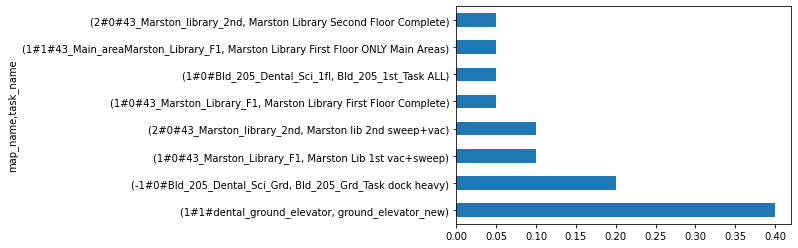

In [26]:
low_efficiency_df[['map_name', 'task_name']].value_counts(normalize=True).plot(kind='barh')

In [27]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# Get unique maps and sort them
maps = sorted(df['map_name'].unique())

# Option 1: Single plot with all maps (good for smaller number of maps)
if len(maps) <= 10:
    fig = px.line(
        df,
        x="start_time",
        y="efficiency",
        color="map_name",
        markers=True,
        title="Efficiency over Time by Map (Pudu Specifications: Cleaning Efficiency: 700～1,000㎡/h)",
        hover_data=['robot_sn', 'task_name']
    )

    fig.add_hline(
        y=500,
        line_dash="dash",
        line_color="red",
        annotation_text="Efficiency Threshold (500)",
        annotation_position="bottom right"
    )

    fig.update_layout(
        xaxis_title="Task Time",
        yaxis_title="Efficiency (m²/h)",
        legend_title="Map Name",
        hovermode="x unified"
    )

    fig.show()

# Option 2: Subplots for each map (better for many maps)
else:
    n = len(maps)
    cols = 2
    rows = (n + cols - 1) // cols  # Ceiling division

    fig = make_subplots(
        rows=rows,
        cols=cols,
        subplot_titles=[f"Map: {map_name}" for map_name in maps],
        shared_xaxes=True,
        shared_yaxes=True,
        vertical_spacing=0.08,
        horizontal_spacing=0.06
    )

    for i, map_name in enumerate(maps, start=1):
        map_df = df[df['map_name'] == map_name].sort_values('start_time')
        row = (i - 1) // cols + 1
        col = (i - 1) % cols + 1

        # Add efficiency line for this map
        fig.add_trace(
            go.Scatter(
                x=map_df['start_time'],
                y=map_df['efficiency'],
                mode='lines+markers',
                name=map_name,
                legendgroup=map_name,
                showlegend=False,  # Don't show legend in subplots
                hovertemplate='<b>%{x}</b><br>' +
                             f'Map: {map_name}<br>' +
                             'Efficiency: %{y:.1f} m²/h<br>' +
                             'Robot: %{customdata[0]}<br>' +
                             'Task: %{customdata[1]}<extra></extra>',
                customdata=map_df[['robot_sn', 'task_name']].values
            ),
            row=row, col=col
        )

        # Add threshold line for each subplot
        fig.add_hline(
            y=500,
            line_dash="dash",
            line_color="red",
            row=row, col=col
        )

    fig.update_layout(
        height=300 * rows,
        title_text="Efficiency over Time by Map (Pudu Specifications: Cleaning Efficiency: 700～1,000㎡/h)",
        showlegend=False,
        hovermode="x unified"
    )

    fig.update_xaxes(title_text="Task Time")
    fig.update_yaxes(title_text="Efficiency (m²/h)")

    fig.show()

# Additional: Show statistics for each map
print("Efficiency Statistics by Map:")
print("=" * 80)
map_stats = df.groupby('map_name').agg({
    'efficiency': ['count', 'mean', 'min', 'max', 'std'],
    'robot_sn': 'nunique'
}).round(1)

map_stats.columns = ['Task Count', 'Avg Efficiency', 'Min Efficiency', 'Max Efficiency', 'Std Efficiency', 'Unique Robots']
map_stats['Low Efficiency Tasks'] = df[df['efficiency'] < 500].groupby('map_name').size()
map_stats['Low Efficiency Tasks'] = map_stats['Low Efficiency Tasks'].fillna(0).astype(int)
map_stats['Low Efficiency %'] = (map_stats['Low Efficiency Tasks'] / map_stats['Task Count'] * 100).round(1)

print(map_stats.sort_values('Avg Efficiency', ascending=False))

# Show maps with the most low efficiency tasks
low_eff_by_map = df[df['efficiency'] < 500].groupby('map_name').size().sort_values(ascending=False)
if not low_eff_by_map.empty:
    print("\nMaps with Most Low Efficiency Tasks (<500):")
    print("=" * 50)
    for map_name, count in low_eff_by_map.head(10).items():
        total_tasks = len(df[df['map_name'] == map_name])
        percentage = (count / total_tasks * 100) if total_tasks > 0 else 0
        print(f"  {map_name}: {count} low tasks ({percentage:.1f}% of {total_tasks} total tasks)")

Efficiency Statistics by Map:
                                    Task Count  Avg Efficiency  \
map_name                                                         
5#0#Marston-5th-floor                        1           662.9   
2#0#Bld205-Floor2                            4           637.4   
1#1#43_Main_areaMarston_Library_F1           9           596.0   
-1#0#Bld_205_Dental_Sci_Grd                 13           585.1   
1#0#Bld_205_Dental_Sci_1fl                  11           574.7   
2#0#43_Marston_library_2nd                  15           514.0   
1#0#43_Marston_Library_F1                    5           497.7   
1#1#dental_ground_elevator                   8           386.8   

                                    Min Efficiency  Max Efficiency  \
map_name                                                             
5#0#Marston-5th-floor                        662.9           662.9   
2#0#Bld205-Floor2                            633.5           642.4   
1#1#43_Main_areaMarston_Libra

In [30]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np


# Extract hour from start_time
df['hour'] = df['start_time'].dt.hour

# Calculate average efficiency by map_name and hour
hourly_efficiency = df.groupby(['map_name', 'hour']).agg({
    'efficiency': ['mean', 'count', 'std'],
    'robot_sn': 'nunique'
}).round(2)

# Flatten column names
hourly_efficiency.columns = ['avg_efficiency', 'task_count', 'std_efficiency', 'unique_robots']
hourly_efficiency = hourly_efficiency.reset_index()

# Pivot for heatmap
pivot_data = hourly_efficiency.pivot(index='map_name', columns='hour', values='avg_efficiency')

# Fill missing hours with NaN (will appear as gray in heatmap)
all_hours = range(0, 24)
for hour in all_hours:
    if hour not in pivot_data.columns:
        pivot_data[hour] = np.nan

pivot_data = pivot_data.reindex(columns=sorted(pivot_data.columns))

print("Average Efficiency by Map and Hour:")
print("=" * 80)
print(hourly_efficiency.sort_values(['map_name', 'hour']).to_string(index=False))

# Create heatmap
fig_heatmap = go.Figure(data=go.Heatmap(
    z=pivot_data.values,
    x=pivot_data.columns,
    y=pivot_data.index,
    colorscale='RdYlGn_r',  # Red-Yellow-Green reversed (red = low efficiency)
    zmin=0,
    zmax=1000,
    hoverongaps=False,
    hovertemplate='Map: %{y}<br>Hour: %{x}:00<br>Avg Efficiency: %{z:.1f} m²/h<extra></extra>',
    colorbar=dict(title="Efficiency (m²/h)")
))

fig_heatmap.update_layout(
    title="Average Efficiency by Map and Hour of Day (Red = Low Efficiency)",
    xaxis_title="Hour of Day",
    yaxis_title="Map Name",
    height=400 + len(pivot_data) * 20,
    xaxis=dict(tickvals=list(range(0, 24)), ticktext=[f"{h:02d}:00" for h in range(0, 24)])
)

fig_heatmap.show()

# Create subplots for each map showing hourly efficiency patterns
maps = sorted(df['map_name'].unique())
n = len(maps)
cols = 2
rows = (n + cols - 1) // cols

fig_hourly = make_subplots(
    rows=rows,
    cols=cols,
    subplot_titles=[f"Map: {map_name}" for map_name in maps],
    shared_xaxes=True,
    shared_yaxes=True,
    vertical_spacing=0.08,
    horizontal_spacing=0.06
)

for i, map_name in enumerate(maps, start=1):
    map_hourly = hourly_efficiency[hourly_efficiency['map_name'] == map_name].sort_values('hour')
    row = (i - 1) // cols + 1
    col = (i - 1) % cols + 1

    # Add bar chart for hourly efficiency
    fig_hourly.add_trace(
        go.Bar(
            x=map_hourly['hour'],
            y=map_hourly['avg_efficiency'],
            name=map_name,
            showlegend=False,
            hovertemplate='Hour: %{x}:00<br>Avg Efficiency: %{y:.1f} m²/h<br>' +
                         'Tasks: %{customdata}<br>' +
                         'Robots: %{text}<extra></extra>',
            customdata=map_hourly['task_count'],
            text=map_hourly['unique_robots'],
            marker_color='lightblue',
            marker_line=dict(color='darkblue', width=1)
        ),
        row=row, col=col
    )

    # Add threshold line
    fig_hourly.add_hline(
        y=500,
        line_dash="dash",
        line_color="red",
        annotation_text="500",
        annotation_font_size=10,
        row=row, col=col
    )

fig_hourly.update_layout(
    height=300 * rows,
    title_text="Hourly Average Efficiency by Map",
    showlegend=False,
    bargap=0.1
)

fig_hourly.update_xaxes(title_text="Hour of Day", tickvals=list(range(0, 24, 2)))
fig_hourly.update_yaxes(title_text="Average Efficiency (m²/h)")

fig_hourly.show()

# Detailed analysis of low efficiency hours
print("\n" + "="*80)
print("LOW EFFICIENCY ANALYSIS BY HOUR:")
print("="*80)

# Identify hours with average efficiency below 500
low_efficiency_hours = hourly_efficiency[hourly_efficiency['avg_efficiency'] < 500]

if not low_efficiency_hours.empty:
    print("\nHours with Average Efficiency < 500:")
    print("-" * 60)
    for _, row in low_efficiency_hours.sort_values(['map_name', 'hour']).iterrows():
        print(f"Map: {row['map_name']:20} | Hour: {row['hour']:2d}:00 | "
              f"Avg Eff: {row['avg_efficiency']:6.1f} | Tasks: {row['task_count']:3d} | "
              f"Robots: {row['unique_robots']}")
else:
    print("No hours found with average efficiency below 500")

# Show worst performing hours for each map
print("\nWorst Performing Hours for Each Map:")
print("-" * 60)
for map_name in maps:
    map_data = hourly_efficiency[hourly_efficiency['map_name'] == map_name]
    if not map_data.empty:
        worst_hour = map_data.loc[map_data['avg_efficiency'].idxmin()]
        best_hour = map_data.loc[map_data['avg_efficiency'].idxmax()]

        print(f"Map: {map_name:20}")
        print(f"  Worst:  Hour {worst_hour['hour']:2d}:00 - {worst_hour['avg_efficiency']:6.1f} m²/h "
              f"({worst_hour['task_count']} tasks)")
        print(f"  Best:   Hour {best_hour['hour']:2d}:00 - {best_hour['avg_efficiency']:6.1f} m²/h "
              f"({best_hour['task_count']} tasks)")
        print(f"  Range:  {worst_hour['avg_efficiency']:.1f} - {best_hour['avg_efficiency']:.1f} m²/h")
        print()

# Additional: Hourly pattern across all maps (aggregated)
print("\nOverall Hourly Efficiency Pattern (All Maps Combined):")
print("-" * 60)
overall_hourly = df.groupby('hour').agg({
    'efficiency': ['mean', 'count', 'std'],
    'map_name': 'nunique',
    'robot_sn': 'nunique'
}).round(2)

overall_hourly.columns = ['avg_efficiency', 'total_tasks', 'std_efficiency', 'unique_maps', 'unique_robots']
overall_hourly = overall_hourly.reset_index()

for _, row in overall_hourly.iterrows():
    status = "LOW" if row['avg_efficiency'] < 500 else "OK"
    print(f"Hour {row['hour']:2d}:00 | Eff: {row['avg_efficiency']:6.1f} | "
          f"Tasks: {row['total_tasks']:4d} | Maps: {row['unique_maps']:2d} | "
          f"Robots: {row['unique_robots']:2d} | {status}")

Average Efficiency by Map and Hour:
                          map_name  hour  avg_efficiency  task_count  std_efficiency  unique_robots
       -1#0#Bld_205_Dental_Sci_Grd     9          673.11           9            8.32              1
       -1#0#Bld_205_Dental_Sci_Grd    11          392.71           1             NaN              1
       -1#0#Bld_205_Dental_Sci_Grd    12          368.62           1             NaN              1
       -1#0#Bld_205_Dental_Sci_Grd    13          396.83           1             NaN              1
       -1#0#Bld_205_Dental_Sci_Grd    14          390.28           1             NaN              1
         1#0#43_Marston_Library_F1    12          502.56           2           27.37              1
         1#0#43_Marston_Library_F1    14          573.38           1             NaN              1
         1#0#43_Marston_Library_F1    15          460.53           1             NaN              1
         1#0#43_Marston_Library_F1    22          449.67        


LOW EFFICIENCY ANALYSIS BY HOUR:

Hours with Average Efficiency < 500:
------------------------------------------------------------
Map: -1#0#Bld_205_Dental_Sci_Grd | Hour: 11:00 | Avg Eff:  392.7 | Tasks:   1 | Robots: 1
Map: -1#0#Bld_205_Dental_Sci_Grd | Hour: 12:00 | Avg Eff:  368.6 | Tasks:   1 | Robots: 1
Map: -1#0#Bld_205_Dental_Sci_Grd | Hour: 13:00 | Avg Eff:  396.8 | Tasks:   1 | Robots: 1
Map: -1#0#Bld_205_Dental_Sci_Grd | Hour: 14:00 | Avg Eff:  390.3 | Tasks:   1 | Robots: 1
Map: 1#0#43_Marston_Library_F1 | Hour: 15:00 | Avg Eff:  460.5 | Tasks:   1 | Robots: 1
Map: 1#0#43_Marston_Library_F1 | Hour: 22:00 | Avg Eff:  449.7 | Tasks:   1 | Robots: 1
Map: 1#0#Bld_205_Dental_Sci_1fl | Hour:  7:00 | Avg Eff:  493.3 | Tasks:   1 | Robots: 1
Map: 1#1#43_Main_areaMarston_Library_F1 | Hour: 13:00 | Avg Eff:  479.4 | Tasks:   1 | Robots: 1
Map: 1#1#dental_ground_elevator | Hour: 11:00 | Avg Eff:  382.2 | Tasks:   5 | Robots: 1
Map: 1#1#dental_ground_elevator | Hour: 12:00 | Avg Eff:

ValueError: Unknown format code 'd' for object of type 'float'

In [39]:
df = table.query_data_as_df("SELECT robot_sn, map_name, task_name, start_time, efficiency, status, progress FROM mnt_robots_task WHERE  start_time >= '2025-09-01 00:00:00'")


/Users/jiaxuchen/Foxx/Monitor/pudu_robot/src/pudu/rds/utils.py:296: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [34]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Filter for non-"Task Ended" statuses
non_ended_df = df[df['status'] != 'Task Ended'].copy()

if non_ended_df.empty:
    print("No tasks found with status other than 'Task Ended'")
else:
    # Convert to datetime and extract day of week
    non_ended_df['start_time'] = pd.to_datetime(non_ended_df['start_time'])
    non_ended_df['day_of_week'] = non_ended_df['start_time'].dt.day_name()
    non_ended_df['day_number'] = non_ended_df['start_time'].dt.dayofweek  # Monday=0, Sunday=6

    # Order days properly
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    non_ended_df['day_of_week'] = pd.Categorical(non_ended_df['day_of_week'], categories=day_order, ordered=True)

    # Get unique statuses
    non_ended_statuses = non_ended_df['status'].unique()

    print("Non-'Task Ended' Status Analysis by Day of Week:")
    print("=" * 80)
    print(f"Total non-'Task Ended' tasks: {len(non_ended_df)}")
    print(f"Unique statuses: {list(non_ended_statuses)}")
    print()

    # Calculate counts by status and day of week
    status_day_counts = non_ended_df.groupby(['status', 'day_of_week']).size().reset_index(name='count')

    # Pivot for heatmap
    pivot_data = status_day_counts.pivot(index='status', columns='day_of_week', values='count').fillna(0)

    # Ensure all days are present
    for day in day_order:
        if day not in pivot_data.columns:
            pivot_data[day] = 0

    pivot_data = pivot_data[day_order]  # Reorder columns

    # Create heatmap
    fig_heatmap = go.Figure(data=go.Heatmap(
        z=pivot_data.values,
        x=pivot_data.columns,
        y=pivot_data.index,
        colorscale='Reds',
        hoverongaps=False,
        hovertemplate='Status: %{y}<br>Day: %{x}<br>Count: %{z}<extra></extra>',
        colorbar=dict(title="Task Count")
    ))

    fig_heatmap.update_layout(
        title="Non-'Task Ended' Tasks by Status and Day of Week",
        xaxis_title="Day of Week",
        yaxis_title="Status",
        height=400 + len(pivot_data) * 30
    )

    fig_heatmap.show()

    # Show detailed statistics
    print("Detailed Breakdown by Status and Day:")
    print("-" * 60)

    for status in non_ended_statuses:
        status_data = non_ended_df[non_ended_df['status'] == status]
        status_day_count = status_data.groupby('day_of_week').size()

        print(f"\nStatus: {status}")
        print(f"Total tasks: {len(status_data)}")

        if not status_day_count.empty:
            most_common_day = status_day_count.idxmax()
            most_common_count = status_day_count.max()
            least_common_day = status_day_count.idxmin()
            least_common_count = status_day_count.min()

            print(f"Most common day: {most_common_day} ({most_common_count} tasks)")
            print(f"Least common day: {least_common_day} ({least_common_count} tasks)")

            # Show counts for all days
            for day in day_order:
                count = status_day_count.get(day, 0)
                percentage = (count / len(status_data)) * 100 if len(status_data) > 0 else 0
                print(f"  {day}: {count:2d} tasks ({percentage:5.1f}%)")

    # Create subplots for each status
    n = len(non_ended_statuses)
    cols = 2
    rows = (n + cols - 1) // cols

    fig_bars = make_subplots(
        rows=rows,
        cols=cols,
        subplot_titles=[f"Status: {status}" for status in non_ended_statuses],
        shared_xaxes=True,
        shared_yaxes=False,
        vertical_spacing=0.1,
        horizontal_spacing=0.08
    )

    for i, status in enumerate(non_ended_statuses, start=1):
        status_data = non_ended_df[non_ended_df['status'] == status]
        day_counts = status_data.groupby('day_of_week').size().reindex(day_order, fill_value=0)

        row = (i - 1) // cols + 1
        col = (i - 1) % cols + 1

        fig_bars.add_trace(
            go.Bar(
                x=day_counts.index,
                y=day_counts.values,
                name=status,
                showlegend=False,
                hovertemplate='Day: %{x}<br>Count: %{y}<br>Status: ' + status + '<extra></extra>',
                marker_color='lightcoral',
                marker_line=dict(color='darkred', width=1)
            ),
            row=row, col=col
        )

        # Add percentage annotations
        total_tasks = len(status_data)
        if total_tasks > 0:
            for j, (day, count) in enumerate(zip(day_counts.index, day_counts.values)):
                percentage = (count / total_tasks) * 100
                if count > 0:  # Only show annotation if there are tasks
                    fig_bars.add_annotation(
                        x=day, y=count,
                        text=f"{percentage:.0f}%",
                        showarrow=False,
                        yshift=10,
                        row=row, col=col
                    )

    fig_bars.update_layout(
        height=300 * rows,
        title_text="Distribution of Non-'Task Ended' Tasks by Day of Week",
        showlegend=False,
        bargap=0.3
    )

    fig_bars.update_xaxes(tickangle=45)
    fig_bars.update_yaxes(title_text="Task Count")

    fig_bars.show()


Non-'Task Ended' Status Analysis by Day of Week:
Total non-'Task Ended' tasks: 31
Unique statuses: ['Task Interrupted', 'Task Cancelled', 'Task Abnormal']



Detailed Breakdown by Status and Day:
------------------------------------------------------------

Status: Task Interrupted
Total tasks: 3
Most common day: Friday (2 tasks)
Least common day: Monday (0 tasks)
  Monday:  0 tasks (  0.0%)
  Tuesday:  0 tasks (  0.0%)
  Wednesday:  1 tasks ( 33.3%)
  Thursday:  0 tasks (  0.0%)
  Friday:  2 tasks ( 66.7%)
  Saturday:  0 tasks (  0.0%)
  Sunday:  0 tasks (  0.0%)

Status: Task Cancelled
Total tasks: 19
Most common day: Monday (4 tasks)
Least common day: Saturday (0 tasks)
  Monday:  4 tasks ( 21.1%)
  Tuesday:  4 tasks ( 21.1%)
  Wednesday:  2 tasks ( 10.5%)
  Thursday:  3 tasks ( 15.8%)
  Friday:  4 tasks ( 21.1%)
  Saturday:  0 tasks (  0.0%)
  Sunday:  2 tasks ( 10.5%)

Status: Task Abnormal
Total tasks: 9
Most common day: Monday (2 tasks)
Least common day: Saturday (0 tasks)
  Monday:  2 tasks ( 22.2%)
  Tuesday:  2 tasks ( 22.2%)
  Wednesday:  2 tasks ( 22.2%)
  Thursday:  2 tasks ( 22.2%)
  Friday:  1 tasks ( 11.1%)
  Saturday:  0 ta

In [42]:
df

,robot_sn,map_name,task_name,start_time,efficiency,status,progress
0,811135422060228,1#0#43_Marston_Library_F1,Marston Lib 1st vac+sweep,2025-09-01 12:06:49,483.21,Task Ended,100.0
1,811135422060228,1#0#43_Marston_Library_F1,Marston Lib 1st vac+sweep,2025-09-01 22:56:59,449.67,Task Ended,100.0
2,811135422060228,2#0#43_Marston_library_2nd,Marston lib 2nd sweep+vac,2025-09-02 09:18:01,516.04,Task Ended,100.0
3,811135422060216,-1#0#Bld_205_Dental_Sci_Grd,Bld_205_Grd_Task ALL,2025-09-02 09:47:43,670.16,Task Ended,100.0
4,811135422060228,1#1#43_Main_areaMarston_Library_F1,Marston Main Areas Clean,2025-09-02 12:52:06,544.34,Task Ended,100.0
...,...,...,...,...,...,...,...
92,811135422060228,1#1#43_Main_areaMarston_Library_F1,Marston Library First Floor ONLY Main Areas,2025-09-30 13:31:17,479.44,Task Ended,100.0
93,811135422060216,1#0#Bld_205_Dental_Sci_1fl,Bld_205_1st_Task ALL,2025-09-30 21:09:08,605.15,Task Cancelled,75.0
94,811135422060216,1#0#Bld_205_Dental_Sci_1fl,Bld_205_1st_Task ALL,2025-10-01 07:00:29,0.00,Task Abnormal,100.0
95,811135422060216,1#0#Bld_205_Dental_Sci_1fl,Bld_205_1st_Task ALL,2025-10-01 09:22:55,0.00,Task Cancelled,0.0


In [44]:
# Group by task_name and status to see start times AND progress
task_status_data = df.groupby(['task_name', 'status']).agg({
    'start_time': list,
    'progress': list
}).reset_index()

# Display the results
for robot_sn in df['robot_sn'].unique():
    df_temp = df[df['robot_sn'] == robot_sn]
    print(f"Robot: {robot_sn}")
    for task_name in df_temp['task_name'].unique():
        task_data = task_status_data[task_status_data['task_name'] == task_name]
        if len(task_data) > 1:  # Only show tasks with multiple statuses
            print(f"\nTask: {task_name}")
            print("-" * 50)
            for _, row in task_data.iterrows():
                status = row['status']
                start_times = row['start_time']
                progress_values = row['progress']
                print(f"  Status: {status}")
                for time, progress in zip(start_times, progress_values):
                    print(f"    - {time} | Progress: {progress}")

Robot: 811135422060228

Task: Marston Lib 1st vac+sweep
--------------------------------------------------
  Status: Task Cancelled
    - 2025-09-07 23:02:14 | Progress: 4.0
  Status: Task Ended
    - 2025-09-01 12:06:49 | Progress: 100.0
    - 2025-09-01 22:56:59 | Progress: 100.0
    - 2025-09-05 12:25:32 | Progress: 100.0

Task: Marston lib 2nd sweep+vac
--------------------------------------------------
  Status: Task Cancelled
    - 2025-09-04 12:40:05 | Progress: 0.0
  Status: Task Ended
    - 2025-09-02 09:18:01 | Progress: 100.0
    - 2025-09-03 09:27:20 | Progress: 100.0
    - 2025-09-04 09:33:29 | Progress: 100.0
    - 2025-09-05 09:22:21 | Progress: 100.0
    - 2025-09-06 13:45:24 | Progress: 100.0
    - 2025-09-07 12:25:23 | Progress: 100.0
    - 2025-09-09 09:24:43 | Progress: 100.0
    - 2025-09-10 09:34:40 | Progress: 100.0

Task: Marston Main Areas Clean
--------------------------------------------------
  Status: Task Cancelled
    - 2025-09-10 14:14:30 | Progress: 66.

In [46]:
df[df['task_name'] == 'Bld_205_1st_Task ALL'].sort_values('start_time')

,robot_sn,map_name,task_name,start_time,efficiency,status,progress
5,811135422060216,1#0#Bld_205_Dental_Sci_1fl,Bld_205_1st_Task ALL,2025-09-02 21:11:06,601.62,Task Ended,100.0
12,811135422060216,1#0#Bld_205_Dental_Sci_1fl,Bld_205_1st_Task ALL,2025-09-03 21:11:42,600.47,Task Ended,100.0
26,811135422060216,1#0#Bld_205_Dental_Sci_1fl,Bld_205_1st_Task ALL,2025-09-05 21:11:57,600.73,Task Ended,100.0
38,811135422060216,1#0#Bld_205_Dental_Sci_1fl,Bld_205_1st_Task ALL,2025-09-09 12:24:33,490.85,Task Cancelled,2.0
39,811135422060216,1#0#Bld_205_Dental_Sci_1fl,Bld_205_1st_Task ALL,2025-09-09 12:32:33,546.24,Task Ended,100.0
62,811135422060216,1#0#Bld_205_Dental_Sci_1fl,Bld_205_1st_Task ALL,2025-09-18 02:43:39,576.31,Task Ended,100.0
61,811135422060216,1#0#Bld_205_Dental_Sci_1fl,Bld_205_1st_Task ALL,2025-09-18 09:26:01,571.41,Task Ended,100.0
58,811135422060216,1#0#Bld_205_Dental_Sci_1fl,Bld_205_1st_Task ALL,2025-09-18 14:00:25,0.00,Task Cancelled,0.0
57,811135422060216,1#0#Bld_205_Dental_Sci_1fl,Bld_205_1st_Task ALL,2025-09-18 21:54:56,603.29,Task Ended,100.0
56,811135422060216,1#0#Bld_205_Dental_Sci_1fl,Bld_205_1st_Task ALL,2025-09-19 07:00:29,493.29,Task Ended,100.0


In [48]:
# Add day of week to the dataframe
df_temp = df[df['task_name'] == 'Bld_205_1st_Task ALL'].copy()
df_temp['day_of_week'] = df_temp['start_time'].dt.day_name()
df_temp['date'] = df_temp['start_time'].dt.date

# Sort by start_time and display
result = df_temp.sort_values('start_time')

print("Task: Bld_205_1st_Task ALL")
print("=" * 80)
print(f"{'Start Time':20} | {'Day of Week':12} | {'Status':15} | {'Progress':8} | {'Robot SN'}")
print("-" * 80)

for _, row in result.iterrows():
    print(f"{row['start_time']} | {row['day_of_week']:12} | {row['status']:15} | {row['progress']:8} | {row['robot_sn']}")

Task: Bld_205_1st_Task ALL
Start Time           | Day of Week  | Status          | Progress | Robot SN
--------------------------------------------------------------------------------
2025-09-02 21:11:06 | Tuesday      | Task Ended      |    100.0 | 811135422060216
2025-09-03 21:11:42 | Wednesday    | Task Ended      |    100.0 | 811135422060216
2025-09-05 21:11:57 | Friday       | Task Ended      |    100.0 | 811135422060216
2025-09-09 12:24:33 | Tuesday      | Task Cancelled  |      2.0 | 811135422060216
2025-09-09 12:32:33 | Tuesday      | Task Ended      |    100.0 | 811135422060216
2025-09-18 02:43:39 | Thursday     | Task Ended      |    100.0 | 811135422060216
2025-09-18 09:26:01 | Thursday     | Task Ended      |    100.0 | 811135422060216
2025-09-18 14:00:25 | Thursday     | Task Cancelled  |      0.0 | 811135422060216
2025-09-18 21:54:56 | Thursday     | Task Ended      |    100.0 | 811135422060216
2025-09-19 07:00:29 | Friday       | Task Ended      |    100.0 | 811135422060

In [50]:
df_temp.groupby('day_of_week')['status'].value_counts()

day_of_week  status        
Friday       Task Ended        2
             Task Cancelled    1
Monday       Task Abnormal     1
             Task Cancelled    1
Thursday     Task Ended        5
             Task Cancelled    2
             Task Abnormal     1
Tuesday      Task Ended        3
             Task Cancelled    2
             Task Abnormal     1
Wednesday    Task Abnormal     2
             Task Cancelled    1
             Task Ended        1
Name: count, dtype: int64

In [8]:
df = table.query_data_as_df("SELECT robot_sn, start_time, status FROM mnt_robots_task")
df.head(1)

/Users/jiaxuchen/Foxx/Monitor/pudu_robot/src/pudu/rds/utils.py:296: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,robot_sn,start_time,status
0,811135422060216,2025-08-14 22:03:08,Task Cancelled


In [9]:
df.columns

Index(['robot_sn', 'start_time', 'status'], dtype='object')

In [10]:
import plotly.express as px

# Count statuses per robot
status_counts = df.groupby(["robot_sn", "status"]).size().reset_index(name="count")

# Compute percentage per robot (aligned with index)
status_counts["percent"] = (
    status_counts["count"] / status_counts.groupby("robot_sn")["count"].transform("sum") * 100
)

# Round and format percentages for labels
status_counts["percent_label"] = status_counts["percent"].round(1).astype(str) + "%"

fig = px.bar(
    status_counts,
    x="robot_sn",
    y="count",
    color="status",
    barmode="group",
    text="percent_label",
    title="Task Status Count per Robot (with %)"
)

fig.update_layout(
    xaxis_title="Robot SN",
    yaxis_title="Task Count",
    legend_title="Status"
)

fig.show()

In [13]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# --- prepare data ---
df['start_time'] = pd.to_datetime(df['start_time'])
df['week_start'] = df['start_time'].dt.to_period("W").apply(lambda p: p.start_time)

# Get all possible weeks, robots, and statuses for complete combination
all_weeks = df['week_start'].unique()
all_robots = df['robot_sn'].unique()
all_statuses = df['status'].unique()

# Create a complete index with all combinations
import itertools
complete_index = pd.MultiIndex.from_product(
    [all_weeks, all_robots, all_statuses],
    names=['week_start', 'robot_sn', 'status']
)

# First, get total tasks per robot per week
weekly_totals = (
    df.groupby(['week_start', 'robot_sn'])
      .size()
      .reset_index(name='total_count')
)

# Then get counts by status
task_weekly = (
    df.groupby(['week_start', 'robot_sn', 'status'])
      .size()
      .reset_index(name='count')
)

# Reindex to include all combinations and fill missing values with 0
task_weekly_complete = (
    task_weekly.set_index(['week_start', 'robot_sn', 'status'])
    .reindex(complete_index, fill_value=0)
    .reset_index()
)

# Merge to calculate percentages
task_weekly_complete = task_weekly_complete.merge(
    weekly_totals,
    on=['week_start', 'robot_sn'],
    how='left'
)

# Fill NaN total_count with 0 (for weeks with no tasks at all for a robot)
task_weekly_complete['total_count'] = task_weekly_complete['total_count'].fillna(0)

# Calculate percentage - handle division by zero
task_weekly_complete['percentage'] = (
    task_weekly_complete['count'] /
    task_weekly_complete['total_count'].replace(0, 1) * 100  # Avoid division by zero
)
# Where total_count is 0, set percentage to 0
task_weekly_complete.loc[task_weekly_complete['total_count'] == 0, 'percentage'] = 0

robots = sorted(task_weekly_complete['robot_sn'].unique(), key=lambda x: str(x))
statuses = list(task_weekly_complete['status'].unique())

# --- assign fixed colors (so same status always same color) ---
color_map = {
    status: color for status, color in zip(
        statuses,
        px.colors.qualitative.Plotly  # or use another palette
    )
}

# --- create subplots ---
n = len(robots)
fig = make_subplots(
    rows=n,
    cols=1,
    shared_xaxes=True,
    shared_yaxes=True,
    vertical_spacing=0.1,
    subplot_titles=[f"Robot {r}" for r in robots]
)

# Add traces
for i, robot in enumerate(robots, start=1):
    robot_df = task_weekly_complete[task_weekly_complete['robot_sn'] == robot].sort_values('week_start')
    for status in statuses:
        s_df = robot_df[robot_df['status'] == status].sort_values('week_start')
        if s_df.empty:
            continue
        fig.add_trace(
            go.Scatter(
                x=s_df['week_start'],
                y=s_df['percentage'],
                mode='lines+markers',
                name=status,
                legendgroup=status,        # 🔹 unify legend across subplots
                line=dict(color=color_map[status]),
                showlegend=(i == 1),       # 🔹 only show legend once (top)
                hovertemplate='<b>%{x}</b><br>' +
                             f'Status: {status}<br>' +
                             'Percentage: %{y:.1f}%<br>' +
                             'Count: %{customdata}<br>' +
                             'Total Tasks: %{text}<extra></extra>',
                customdata=s_df['count'],  # Show raw count in hover
                text=s_df['total_count']   # Show total tasks in hover
            ),
            row=i, col=1
        )

# Layout
fig.update_layout(
    height=max(600, 240 * n),
    title_text="Weekly Task Percentage per Robot — weekly percentage of tasks by status (one subplot per robot)",
    hovermode='x unified',
    legend_title_text='Status'
)

# unify y and x axis labels
fig.update_yaxes(title_text='Task Percentage (%)', range=[0, 100])  # Set fixed range for percentage
fig.update_xaxes(title_text='Week Start', row=n, col=1)
fig.update_xaxes(tickformat='%b %d\n%Y')

fig.show()

In [ ]:
data_list = df.drop(columns=['id']).to_dict(orient='records')
data_list_new = data_list.copy()[0]
data_list_new['task_namess'] = '123'
data_list_new['task_name'] = 'mode1'
changes = detect_data_changes(table, [data_list_new], table.primary_keys)
changes

In [ ]:
get_robot_details('811135422060216')

In [ ]:
get_robot_details('811135422060228')

In [ ]:
df = get_schedule_table(start_time='2025-08-11 00:00:00', end_time='2025-08-18 23:59:59')
df

In [ ]:
results = get_cleaning_report_list(start_time='2025-08-11 00:00:00', end_time='2025-08-18 23:59:59', shop_id='533370001',
                                           timezone_offset=0)['list']
results

In [ ]:
df = get_schedule_table(start_time='2025-08-11 00:00:00', end_time='2025-08-18 23:59:59')
df

In [ ]:
# Get configuration file path - try multiple locations
import os
config_paths = [
    'database_config.yaml',
    '../src/pudu/configs/database_config.yaml',
    'src/pudu/configs/database_config.yaml',
    'pudu/configs/database_config.yaml',
    '/opt/database_config.yaml'
]

config_path = None
for path in config_paths:
    if os.path.exists(path):
        config_path = path
        break

In [ ]:
app = App(config_path)

In [ ]:
start_time_str = '2025-08-11 00:00:00'
end_time_str = '2025-08-18 23:59:59'

success = app.run(start_time=start_time_str, end_time=end_time_str)

In [ ]:
df = get_ongoing_tasks_table()

In [ ]:
df.columns

In [ ]:
df.to_dict(orient='records')

In [ ]:
df.to_dict(orient='records')

In [ ]:
get_robot_details('8110H4802050005')

In [ ]:
pd.to_datetime(1747273785400, unit='ms')

In [ ]:
get_robot_details('8110H4802050005')

In [ ]:
pd.to_datetime(1755249066, unit='s')

In [ ]:
df = get_schedule_table(start_time='2025-08-11 00:00:00', end_time='2025-08-18 23:59:59')
df

In [ ]:
get_cleaning_report_list(start_time='2025-08-16 00:00:00', end_time='2025-08-17 23:59:59', shop_id='450270000', sn='8110H4802050005')

In [ ]:
import timezone

In [ ]:
data = get_cleaning_report_list(start_time='2025-08-13 00:00:00', end_time='2025-08-13 23:59:59', shop_id='533370001', sn='811135422060228')['list']
# convert to datetime
for i in data:
    if i['report_id'] == '1153161039358726144':
        start_time = pd.to_datetime(i['start_time'], unit='s').tz_localize('UTC').tz_convert('US/Eastern')
        end_time = pd.to_datetime(i['end_time'], unit='s').tz_localize('UTC').tz_convert('US/Eastern')
        clean_time = round(i['clean_time'] / 3600, 2)
        print("Report ID: {}; Report start time: {}; Report end time: {}; end_time - start_time: {}; Report's clean_time: {}h;".format(i['report_id'],start_time.strftime('%Y-%m-%d %H:%M:%S'), end_time.strftime('%Y-%m-%d %H:%M:%S'), end_time - start_time, clean_time))
        break

In [10]:
from datetime import datetime, timedelta, timezone

target_sn = "811135422060228"
end_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
start_time = (datetime.now(timezone.utc) - timedelta(hours=1)).strftime("%Y-%m-%d %H:%M:%S")

battery_data = get_battery_health_list(start_time, end_time, sn=target_sn)

if battery_data and "list" in battery_data and battery_data["list"]:
    latest_record = max(battery_data["list"], key=lambda x: x.get("upload_time", ""))
    print(f"Robot {target_sn} SOH: {latest_record.get('soh')}%")
    print(f"Time: {latest_record.get('upload_time')}")
else:
    print(f"{target_sn} no data")

Robot 811135422060228 SOH: 98%
Time: 2025-10-13 05:59:48


In [10]:
from datetime import datetime, timedelta, timezone

target_sn = "811135422060228"
end_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
start_time = (datetime.now(timezone.utc) - timedelta(hours=1)).strftime("%Y-%m-%d %H:%M:%S")
start_time

'2025-10-14 02:45:51'

In [ ]:
get_list_stores()['list']

In [ ]:
get_cleaning_report_list(start_time='2025-08-15 00:00:00', end_time='2025-08-15 23:59:59', shop_id='533370001', sn='811135422060216')

In [ ]:
int(time.time())

curl -X POST "http://3.142.93.105:8000/api/pudu/webhook" -H "Content-Type: application/json" -H "CallbackCode: 1vQ6MfUxqyoGMRQ9nK8C4pSkg1Qsa3Vpq" -d '{"callback_type": "notifyRobotPose", "data": {"sn": "811135422060216", "timestamp": 1756248555, "x":1.234, "y":2.345, "yaw":32.34}}'

curl -X POST "http://44.193.26.65:8000/api/pudu/webhook" -H "Content-Type: application/json" -H "CallbackCode: 1vQ6MfUxqyoGMRQ9nK8C4pSkg1Qsa3Vpq" -d '{"callback_type": "robotErrorWarning", "data": {"sn": "811064412050012", "timestamp": 1755387517, "error_type": "LostLocalization", "error_level": "Warning", "error_detail": "",  "error_id": "test00003"}}'

curl -X GET "http://18.222.168.242:8000/api/pudu/webhook/health"

curl -X GET "http://3.142.93.105:8000/api/pudu/webhook/health"

import time

In [ ]:
for result in charging_table['list']:
    print(result['sn'], result['work_status'])

In [ ]:
sns = set()
for result in charging_table['list']:
    sns.add(result['sn'])
sns

In [ ]:
battery_health_dict = {}
sn = set()
for health_record in charging_table['list']:
    key = health_record['sn']
    sn.add(key)
    battery_health_dict[key] = {
        'cycle': health_record.get('cycle', None),
        'soc': health_record.get('soc', None),
        'soh': health_record.get('soh', None)
    }

In [ ]:
get_list_robots(shop_id='533370001')['list']

In [ ]:
sn

In [ ]:
results = get_charging_record_list(start_time, end_time, shop_id='533370001', timezone_offset=0)['list']

In [ ]:
sns = set()
for result in results:
    sns.add(result['sn'])
sns

In [ ]:
s = get_charging_table(start_time, end_time, location_id='533370001')
s